In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb

In [3]:
import pandas as pd

# Assuming df1 is your big dataset and df2 is your smaller dataset
# Make sure both DataFrames have a column named 'id'
input_file = 'sterimol/IDPiDataset_noI.xlsx'

# Specify the column number (0-based index) containing strings
# Read the CSV file into a DataFrame
df1 = pd.read_excel(input_file)
print(len(df1[:]))
def delete_rows_with_same_values(df, columns_to_check):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    X.sort_values(by="ddG", ascending=False)
    # Identify rows where specified columns have the same value
    rows_to_delete = X.duplicated(subset=columns_to_check, keep='first') 

    # Invert the boolean mask to keep rows that don't have the same values in specified columns
    X_filtered = X[~rows_to_delete]

    return X_filtered

columns_to_check_for_duplicates = ['electrophile SMILES', 'nucleophile SMILES',
        '3,3â€™ Catalyst Substituent ', 'Temperature K','solvent',
        'N Catalyst Substituent']
df1 = delete_rows_with_same_values(df1, columns_to_check_for_duplicates)
input_file2 = 'sterimol/results_sterimol.csv'
print(len(df1[:]))
df2 = pd.read_csv(input_file2)


# Merge the two DataFrames on the 'id' column
result = pd.merge(df1 ,df2, left_on='3,3â€™ Catalyst Substituent ', right_on='old_name', how='left')
#result = result[result['electrophile SMILES'] != result['nucleophile SMILES']]

result.to_csv("sterimol/merged.csv")

277
266


In [4]:
result = pd.read_csv("sterimol/merged_final_nosol.csv")
#result = result[result['electrophile SMILES'] != result['nucleophile SMILES']]
#result=result.reset_index(drop=True)
df2 = pd.read_csv('sterimol/results_sterimol_V.csv')


# Merge the two DataFrames on the 'id' column
result = pd.merge(result ,df2, on='File_Name', how='left')
result



,Unnamed: 0.1,reaction,electrophile SMILES,nucleophile SMILES,ReactionSMILES,"3,3â€™ Catalyst Substituent",N Catalyst Substituent,catalyst SMILES,solvent,time (hours),...,3_crippen_y,4_crippen_y,0_mcgowan_y,1_mcgowan_y,2_mcgowan_y,3_mcgowan_y,4_mcgowan_y,Vbur35,Vbur5,Vbur75
0,0,1a,O=Cc2ccc1ccccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,96,...,8.753,8.753,8.02,4.55,16.04,12.57,12.57,53.791740,29.696723,10.694121
1,1,1b,COc2ccc1cc(C=O)ccc1c2,C=CC[Si](C)(C)C,COc2ccc1cc(C=O)ccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,192,...,8.753,8.753,8.02,4.55,16.04,12.57,12.57,53.791740,29.696723,10.694121
2,2,1c,O=Cc2ccc1cc(Br)ccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1cc(Br)ccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,192,...,8.753,8.753,8.02,4.55,16.04,12.57,12.57,53.791740,29.696723,10.694121
3,3,1d,O=Cc1ccccc1,C=CC[Si](C)(C)C,O=Cc1ccccc1C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,48,...,8.814,4.407,8.02,4.55,16.04,16.04,8.02,53.791740,29.696723,10.694121
4,4,1e,O=Cc1ccccc1F,C=CC[Si](C)(C)C,O=Cc1ccccc1FC=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,48,...,9.922,4.407,8.02,4.55,12.57,21.27,8.02,53.791740,29.696723,10.694121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,256,3e,CC/C=C(C)/C=O,C1=CCC=C1,CC/C=C(C)/C=OC1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,CH2Cl2,96,...,4.617,5.674,8.02,4.55,19.70,8.21,11.68,36.490168,17.276003,7.767166
253,257,3f,O=CC1=CCCCC1,C1=CCC=C1,O=CC1=CCCCC1C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,NaN,CH2Cl2,96,...,9.234,4.617,8.02,4.55,16.23,16.42,8.21,36.490168,17.276003,7.767166
254,258,3u,C/C=C(C)/C=O,C1=CCC=C1,C/C=C(C)/C=OC1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,NaN,CH2Cl2,72,...,5.674,0.000,8.02,4.55,19.70,11.68,0.00,36.490168,17.276003,7.767166
255,259,3v,O=CC1=CCCC1,C1=CCC=C1,O=CC1=CCCC1C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,CH2Cl2,72,...,9.234,0.000,8.02,4.55,16.23,16.42,0.00,36.490168,17.276003,7.767166


In [6]:
print(len(np.unique(result['electrophile SMILES'])),len(np.unique(result['nucleophile SMILES'])),len(np.unique(result['N Catalyst Substituent'])),len(np.unique(result['3,3â€™ Catalyst Substituent '])))

151 48 5 24


In [5]:
from common_functions import *

electrophileSMILES = result['electrophile SMILES'].values
electrophiledescriptors = smi2RDKIT(electrophileSMILES)
nucleophileSMILES = result['nucleophile SMILES'].values
nucleophiledescriptors = smi2RDKIT(nucleophileSMILES)
threethreesubSMILES = result['3,3â€™ Catalyst Substituent '].values
threethreesubdescriptors = smi2RDKIT(threethreesubSMILES)
"""nsubSMILES = result['N Catalyst Substituent'].values
nsubdescriptors = smi2RDKIT(nsubSMILES)"""

"nsubSMILES = result['N Catalyst Substituent'].values\nnsubdescriptors = smi2RDKIT(nsubSMILES)"

In [17]:
#alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub').join(nsubdescriptors, rsuffix='nsubdescriptors')
alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub')#.join(nsubdescriptors, rsuffix='nsubdescriptors')

alldescriptors.to_csv('alldescriptors.csv', index=False)
def delete_columns_with_string(df, string_to_exclude):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    
    # Delete columns that include the specified string
    columns_to_delete = [col for col in X.columns if string_to_exclude in col]
    X_filtered = X.drop(columns=columns_to_delete)

    return X_filtered
alldescriptors = delete_columns_with_string(alldescriptors, "AbsPartialCharge")

alldescriptors

,MaxAbsEStateIndexelectrophile,MaxEStateIndexelectrophile,MinAbsEStateIndexelectrophile,MinEStateIndexelectrophile,qedelectrophile,MolWtelectrophile,HeavyAtomMolWtelectrophile,ExactMolWtelectrophile,NumValenceElectronselectrophile,NumRadicalElectronselectrophile,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.450170,10.450170,0.730278,0.730278,0.579913,156.184,148.120,156.057515,58.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.548588,10.548588,0.696914,0.696914,0.673793,186.210,176.130,186.068080,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.507847,10.507847,0.717428,0.717428,0.691883,235.080,228.024,233.968027,64.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.006481,10.006481,0.729167,0.729167,0.495636,106.124,100.076,106.041865,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.358704,12.358704,0.108796,-0.465278,0.519899,124.114,119.074,124.032443,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,9.826481,9.826481,0.821759,0.821759,0.377957,98.145,88.065,98.073165,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,10.091620,10.091620,0.971389,0.971389,0.469249,110.156,100.076,110.073165,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.667593,9.667593,0.787037,0.787037,0.343827,84.118,76.054,84.057515,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,9.938843,9.938843,0.951389,0.951389,0.449462,96.129,88.065,96.057515,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
result.columns

Index(['Unnamed: 0.1', 'reaction', 'electrophile SMILES', 'nucleophile SMILES',
       'ReactionSMILES', '3,3â€™ Catalyst Substituent ',
       'N Catalyst Substituent', 'catalyst SMILES', 'solvent', 'time (hours)',
       ...
       '3_crippen_y', '4_crippen_y', '0_mcgowan_y', '1_mcgowan_y',
       '2_mcgowan_y', '3_mcgowan_y', '4_mcgowan_y', 'Vbur35', 'Vbur5',
       'Vbur75'],
      dtype='object', length=101)

In [11]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[cols_to_keep]
result_df

,MaxAbsEStateIndexelectrophile,MaxEStateIndexelectrophile,MinAbsEStateIndexelectrophile,MinEStateIndexelectrophile,qedelectrophile,MolWtelectrophile,HeavyAtomMolWtelectrophile,ExactMolWtelectrophile,NumValenceElectronselectrophile,MaxPartialChargeelectrophile,...,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_alkyl_halide,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_halogen,fr_unbrch_alkane
0,10.450170,10.450170,0.730278,0.730278,0.579913,156.184,148.120,156.057515,58.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
1,10.548588,10.548588,0.696914,0.696914,0.673793,186.210,176.130,186.068080,70.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
2,10.507847,10.507847,0.717428,0.717428,0.691883,235.080,228.024,233.968027,64.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
3,10.006481,10.006481,0.729167,0.729167,0.495636,106.124,100.076,106.041865,40.0,0.149548,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
4,12.358704,12.358704,0.108796,-0.465278,0.519899,124.114,119.074,124.032443,46.0,0.152494,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,9.826481,9.826481,0.821759,0.821759,0.377957,98.145,88.065,98.073165,40.0,0.144920,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
253,10.091620,10.091620,0.971389,0.971389,0.469249,110.156,100.076,110.073165,44.0,0.145202,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
254,9.667593,9.667593,0.787037,0.787037,0.343827,84.118,76.054,84.057515,34.0,0.144910,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
255,9.938843,9.938843,0.951389,0.951389,0.449462,96.129,88.065,96.057515,38.0,0.145202,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0


In [1533]:
from sklearn.feature_selection import VarianceThreshold

VT = VarianceThreshold()
descriptors = VT.fit_transform(result_df)
len(descriptors)


256

In [10]:
col_names = ['ddG','ster1', 'ster2', 'solvent',
       'ster3',  
       'electrophile SMILES', 'nucleophile SMILES',#'Atom1_charge', 'Valance_atom1', 
       #'TotalNBO_atom1',# 'Atom2_charge', 'Valance_atom2',#
       #'TotalNBO_atom2',
       'HOMO',
       'N Catalyst Substituent', 'Temperature K',
       'polarxx',  'polaryy', 
       'polarzz', 'mean_polar', #
       'biggest distance',
       'major_axis', 'Axis_2', 'Axis_3' ,
       'L_x', 'Bmin_x', 'Bmax_x', 'bur_vol_x', 
       'nL', 'nBmin', 'nBmax', 'nbur_vol', 
        '3,3â€™ Catalyst Substituent ',
       'tot_V_x', 'disp_x',  
       #'min_axis_x',
       'Vbur75',#
       #'Vbur35', 
       #'Vbur5', 
        'tot_V_y', 'disp_y',  
        #'min_axis_y', 
        '2_crippen_x','3_crippen_x', '4_crippen_x', 
        '2_crippen_y', '3_crippen_y', '4_crippen_y',
       'max_distance_x','max_distance_y'#'A2_x',  #'A2_y',
       #'0_mcgowan_x', '1_mcgowan_x','2_mcgowan_x', '3_mcgowan_x', '4_mcgowan_x', 
       #'0_mcgowan_y', '1_mcgowan_y', '2_mcgowan_y', '3_mcgowan_y', '4_mcgowan_y'
      ]
DFT_data = result.loc[:,col_names]

DFT_data["Temperature K"] = 1/DFT_data["Temperature K"]
DFT_data["std_pol"] = DFT_data[['polarxx','polaryy','polarzz']].std(axis=1)
#DFT_data["max_pol"] = DFT_data[['polarxx','polaryy','polarzz']].max(axis=1)
DFT_data["Box_vol"] = DFT_data['major_axis']*DFT_data['Axis_2']*DFT_data['Axis_3']
DFT_data["RAxis_2"] = DFT_data['Axis_2']/DFT_data['major_axis']
DFT_data["RAxis_3"] = DFT_data['Axis_3']/DFT_data['major_axis']
DFT_data["disp_x"] = DFT_data['disp_x']/DFT_data['max_distance_x']
DFT_data["disp_y"] = DFT_data['disp_y']/DFT_data['max_distance_y']


DFT_data = DFT_data.drop(['polarxx','polaryy','polarzz','major_axis','Axis_2','Axis_3', 'max_distance_x','max_distance_y'],axis=1)
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop' parameter avoids multicollinearity
#X_encoded = pd.DataFrame(encoder.fit_transform(DFT_data[['N Catalyst Substituent']]), columns=encoder.get_feature_names_out(['N Catalyst Substituent']))


DFT_data['Ncat_alif'] = DFT_data['N Catalyst Substituent'].apply(lambda x: 1 if x == 'NS(=O)(=O)C(F)(F)F' else (2 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)F' else (4 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F' else ( 6 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F' else 0))))

# Create another column 'DifferentColumn' and assign values based on different conditions
DFT_data['Ncat_arom'] = DFT_data['N Catalyst Substituent'].apply(lambda x: 1 if x == 'NS(=O)(=O)c1c(F)c(F)c(F)c(F)c1F' else 0)

DFT_data['solv_dipol'] = DFT_data['solvent'].apply(lambda x: 3.1 if x == 'CH2Cl2' else (4.1 if x == 'CHCl3' else (0.2 if x == 'cyclohexane' else ( 3.1 if x == 'DCM' else ( 2.8 if x == 'Et2O' else ( 2.3 if x == 'M-xylene' else ( 0.2 if x == 'Methyl-cyclohexane' or x=='methylcyclohexane' or x=='Methylcyclohexane' else ( 2.3 if x == 'P-xylene'  else ( 2.4 if x == 'toluene'  else np.NaN)))))))))
DFT_data['solv_dipol'] = DFT_data['solv_dipol'].fillna(np.mean(DFT_data['solv_dipol']))


ddg= result.loc[:,'ddG']

ddg


0      1.231712
1      1.066407
2      1.002518
3      0.896691
4      1.033884
         ...   
252    1.338303
253    1.338303
254    1.092856
255    1.195347
256    0.537292
Name: ddG, Length: 257, dtype: float64

In [11]:
import pickle
with open('sterimol/subsets_electrophile.pickle', 'rb') as infile:
    subsets_e = pickle.load(infile)
with open('sterimol/subsets_nucleophile.pickle', 'rb') as infile:
    subsets_n = pickle.load(infile)



def create_matrix(data_dict):
    unique_smi_values = set(entry[key] for entry in data_dict.values() for key in ['smi1', 'smi2'])

    # Create an empty similarity matrix
    num_unique_values = len(unique_smi_values)
    similarity_matrix = np.zeros((num_unique_values, num_unique_values))

    # Create a dictionary to map each unique value to its index in the matrix
    value_to_index = {value: index for index, value in enumerate(unique_smi_values)}
    smi1_to_matrix_index = {smi1: [] for smi1 in unique_smi_values}
    
    # Fill in the similarity matrix with 'tan_mcs' or 'tan_12' values
    for entry in data_dict.values():
        index1 = value_to_index[entry['smi1']]
        smi1_to_matrix_index[entry['smi1']].extend([index1])
        # Check if 'smi2' exists in the entry
        if 'smi2' in entry:
            index2 = value_to_index[entry['smi2']]
            smi1_to_matrix_index[entry['smi2']].append(index2)
            
            # Assuming either 'tan_mcs' or 'tan_12' will be present in each entry
            tan_value_key = 'tan_mcs' 
            
            similarity_matrix[index1, index2] = entry[tan_value_key]
            similarity_matrix[index2, index1] = entry[tan_value_key]

        
 
        
    # Convert lists of row indices to unique sets
    smi1_to_matrix_index = {smi1: list(set(indices)) for smi1, indices in smi1_to_matrix_index.items()}
    
    return similarity_matrix, smi1_to_matrix_index



mat_e, dict_e = create_matrix(subsets_e)
mat_n, dict_n = create_matrix(subsets_n)



In [12]:
DFT_data

,ddG,ster1,ster2,solvent,ster3,electrophile SMILES,nucleophile SMILES,HOMO,N Catalyst Substituent,Temperature K,...,2_crippen_y,3_crippen_y,4_crippen_y,std_pol,Box_vol,RAxis_2,RAxis_3,Ncat_alif,Ncat_arom,solv_dipol
0,1.231712,8.98,1.7,toluene,4.42,O=Cc2ccc1ccccc1c2,C=CC[Si](C)(C)C,-0.26066,NS(=O)(=O)C(F)(F)F,0.005124,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
1,1.066407,8.98,1.7,toluene,4.42,COc2ccc1cc(C=O)ccc1c2,C=CC[Si](C)(C)C,-0.26066,NS(=O)(=O)C(F)(F)F,0.005124,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
2,1.002518,8.98,1.7,toluene,4.42,O=Cc2ccc1cc(Br)ccc1c2,C=CC[Si](C)(C)C,-0.26066,NS(=O)(=O)C(F)(F)F,0.005124,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
3,0.896691,8.98,1.7,toluene,4.42,O=Cc1ccccc1,C=CC[Si](C)(C)C,-0.26066,NS(=O)(=O)C(F)(F)F,0.005124,...,8.814,8.814,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
4,1.033884,8.98,1.7,toluene,4.42,O=Cc1ccccc1F,C=CC[Si](C)(C)C,-0.26066,NS(=O)(=O)C(F)(F)F,0.004692,...,7.664,9.922,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1.338303,11.15,1.7,CH2Cl2,4.49,CC/C=C(C)/C=O,C1=CCC=C1,-0.26240,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,0.005775,...,10.244,4.617,5.674,141.535154,170.347416,0.409886,0.167639,4,0,3.1
253,1.338303,11.15,1.7,CH2Cl2,4.49,O=CC1=CCCCC1,C1=CCC=C1,-0.26240,NS(=O)(=O)C(F)(F)C(F)(F)F,0.005775,...,9.187,9.234,4.617,141.535154,170.347416,0.409886,0.167639,2,0,3.1
254,1.092856,11.15,1.7,CH2Cl2,4.49,C/C=C(C)/C=O,C1=CCC=C1,-0.26240,NS(=O)(=O)C(F)(F)C(F)(F)F,0.005775,...,10.244,5.674,0.000,141.535154,170.347416,0.409886,0.167639,2,0,3.1
255,1.195347,11.15,1.7,CH2Cl2,4.49,O=CC1=CCCC1,C1=CCC=C1,-0.26240,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,0.005775,...,9.187,9.234,0.000,141.535154,170.347416,0.409886,0.167639,4,0,3.1


In [13]:
param_grid = {
    'n_estimators': [10,20,50, 75, 100],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,6,8]
}

In [422]:
VT = VarianceThreshold()
descriptors = VT.fit_transform(result_df)
np.shape(descriptors)

(257, 87)

In [841]:
from sklearn.feature_selection import VarianceThreshold

def feature_reducer(df):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    
    # Apply VarianceThreshold
    VT = VarianceThreshold()
    descriptors = VT.fit_transform(X)
    
    # Get the columns that are retained by VarianceThreshold
    columns_after_variance_threshold = X.columns[VT.get_support()]
    
    # Create a DataFrame after VarianceThreshold
    X_after_variance_threshold = X[columns_after_variance_threshold]

    # Calculate the correlation matrix for the DataFrame after VarianceThreshold
    correlation_matrix = X_after_variance_threshold.corr()

    # Set a correlation threshold
    correlation_threshold = 0.9  # You can adjust this based on your requirements

    # Create a mask to identify highly correlated features
    corr_mask = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1)

    # Identify the columns to keep (those not highly correlated)
    columns_to_keep = X_after_variance_threshold.columns[~corr_mask.any()]

    # Create the final filtered DataFrame with retained column names
    X_filtered = X_after_variance_threshold[columns_to_keep]

    return X_filtered



nucleophiledescriptors = feature_reducer(nucleophiledescriptors)
#threethreesubdescriptors = feature_reducer(threethreesubdescriptors)
"""nsubdescriptors = feature_reducer(nsubdescriptors)
"""
electrophiledescriptors = feature_reducer(electrophiledescriptors)
#alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub').join(nsubdescriptors, rsuffix='nsubdescriptors')

alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile')#.join(nsubdescriptors, rsuffix='nsubdescriptors')
alldescriptors = feature_reducer(alldescriptors)
#alldescriptors = delete_columns_with_string(alldescriptors, "AbsPartialCharge")
alldescriptors

,MaxAbsEStateIndexelectrophile,MaxEStateIndexelectrophile,MinAbsEStateIndexelectrophile,MinEStateIndex,qedelectrophile,FpDensityMorgan1electrophile,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWLOWelectrophile,BCUT2D_LOGPHI,...,VSA_EState5nucleophile,VSA_EState7nucleophile,VSA_EState8nucleophile,VSA_EState9,NumAliphaticHeterocycles,NumSaturatedHeterocyclesnucleophile,RingCountnucleophile,fr_alkyl_halidenucleophile,fr_aryl_methylnucleophile,fr_unbrch_alkanenucleophile
0,10.450170,10.450170,0.730278,0.730278,0.579913,0.916667,1.666667,2.416667,10.085499,2.135515,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
1,10.548588,10.548588,0.696914,0.696914,0.673793,1.071429,1.785714,2.500000,10.077790,2.206303,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
2,10.507847,10.507847,0.717428,0.717428,0.691883,1.000000,1.692308,2.461538,10.084982,2.197046,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
3,10.006481,10.006481,0.729167,0.729167,0.495636,1.125000,1.750000,2.125000,10.236032,1.909959,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
4,12.358704,12.358704,0.108796,-0.465278,0.519899,1.333333,2.000000,2.444444,10.217133,2.008867,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,9.826481,9.826481,0.821759,0.821759,0.377957,1.714286,2.285714,2.428571,10.269758,1.867847,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0
253,10.091620,10.091620,0.971389,0.971389,0.469249,1.500000,2.375000,2.750000,10.010597,2.139417,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0
254,9.667593,9.667593,0.787037,0.787037,0.343827,1.666667,2.166667,2.166667,10.330052,1.797093,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0
255,9.938843,9.938843,0.951389,0.951389,0.449462,1.714286,2.571429,2.857143,10.260013,2.136217,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
# choose 200 molecular descriptors
chosen_descriptors  = ['ExactMolWt',  'Kappa1', 'MaxEStateIndex', 'MaxPartialCharge',   'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NumRotatableBonds', 'PEOE_VSA1', 'SMR_VSA1', 'SlogP_VSA1', 'VSA_EState1', 'qed']
chosen_descriptors  = ['Kappa1','MaxPartialCharge',   'MinEStateIndex', 'MinPartialCharge', 'MolLogP',  'qed','ExactMolWt']
chosen_descriptors2 = ['ExactMolWt', 'MaxPartialCharge',    'MolLogP',  'fr_C_S']


In [18]:
def add_suffixes(input_list,input_list2):
    result_list = []
    for entry in input_list:
        result_list.append(entry + 'electrophile')
        result_list.append(entry + 'nucleophile')
    for entry in input_list2:
        result_list.append(entry + '')
    return result_list

# Example list


# Add suffixes '_e' and '_n' to each entry
output_list = add_suffixes(chosen_descriptors,chosen_descriptors2)

# Display the result
print(output_list)

['Kappa1electrophile', 'Kappa1nucleophile', 'MaxPartialChargeelectrophile', 'MaxPartialChargenucleophile', 'MinEStateIndexelectrophile', 'MinEStateIndexnucleophile', 'MinPartialChargeelectrophile', 'MinPartialChargenucleophile', 'MolLogPelectrophile', 'MolLogPnucleophile', 'qedelectrophile', 'qednucleophile', 'ExactMolWtelectrophile', 'ExactMolWtnucleophile', 'ExactMolWt', 'MaxPartialCharge', 'MolLogP', 'fr_C_S']


In [19]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[output_list]
result_df

,Kappa1electrophile,Kappa1nucleophile,MaxPartialChargeelectrophile,MaxPartialChargenucleophile,MinEStateIndexelectrophile,MinEStateIndexnucleophile,MinPartialChargeelectrophile,MinPartialChargenucleophile,MolLogPelectrophile,MolLogPnucleophile,qedelectrophile,qednucleophile,ExactMolWtelectrophile,ExactMolWtnucleophile,ExactMolWt,MaxPartialCharge,MolLogP,fr_C_S
0,7.042665,6.956883,0.149570,0.047963,0.730278,-0.775270,-0.297896,-0.103369,2.6523,2.5106,0.579913,0.382049,156.057515,114.086477,128.06260,-0.018404,2.8398,0.0
1,8.754380,6.956883,0.149570,0.047963,0.696914,-0.775270,-0.496745,-0.103369,2.6609,2.5106,0.673793,0.382049,186.068080,114.086477,128.06260,-0.018404,2.8398,0.0
2,8.448344,6.956883,0.149570,0.047963,0.717428,-0.775270,-0.297896,-0.103369,3.4148,2.5106,0.691883,0.382049,233.968027,114.086477,128.06260,-0.018404,2.8398,0.0
3,5.035138,6.956883,0.149548,0.047963,0.729167,-0.775270,-0.297896,-0.103369,1.4991,2.5106,0.495636,0.382049,106.041865,114.086477,128.06260,-0.018404,2.8398,0.0
4,5.947877,6.956883,0.152494,0.047963,-0.465278,-0.775270,-0.297781,-0.103369,1.6382,2.5106,0.519899,0.382049,124.032443,114.086477,128.06260,-0.018404,2.8398,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,6.410000,2.703214,0.144920,-0.016293,0.821759,1.138889,-0.298281,-0.080750,1.5416,1.5025,0.377957,0.401713,98.073165,66.046950,178.07825,-0.010542,3.9930,0.0
253,5.544953,2.703214,0.145202,-0.016293,0.971389,1.138889,-0.298269,-0.080750,1.6857,1.5025,0.469249,0.401713,110.073165,66.046950,178.07825,-0.010542,3.9930,0.0
254,5.410000,2.703214,0.144910,-0.016293,0.787037,1.138889,-0.298281,-0.080750,1.1515,1.5025,0.343827,0.401713,84.057515,66.046950,178.07825,-0.010542,3.9930,0.0
255,4.566006,2.703214,0.145202,-0.016293,0.951389,1.138889,-0.298269,-0.080750,1.2956,1.5025,0.449462,0.401713,96.057515,66.046950,178.07825,-0.010542,3.9930,0.0


In [20]:
alldesc = pd.concat([result_df ,DFT_data], axis=1)

alldesc

,Kappa1electrophile,Kappa1nucleophile,MaxPartialChargeelectrophile,MaxPartialChargenucleophile,MinEStateIndexelectrophile,MinEStateIndexnucleophile,MinPartialChargeelectrophile,MinPartialChargenucleophile,MolLogPelectrophile,MolLogPnucleophile,...,2_crippen_y,3_crippen_y,4_crippen_y,std_pol,Box_vol,RAxis_2,RAxis_3,Ncat_alif,Ncat_arom,solv_dipol
0,7.042665,6.956883,0.149570,0.047963,0.730278,-0.775270,-0.297896,-0.103369,2.6523,2.5106,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
1,8.754380,6.956883,0.149570,0.047963,0.696914,-0.775270,-0.496745,-0.103369,2.6609,2.5106,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
2,8.448344,6.956883,0.149570,0.047963,0.717428,-0.775270,-0.297896,-0.103369,3.4148,2.5106,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
3,5.035138,6.956883,0.149548,0.047963,0.729167,-0.775270,-0.297896,-0.103369,1.4991,2.5106,...,8.814,8.814,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
4,5.947877,6.956883,0.152494,0.047963,-0.465278,-0.775270,-0.297781,-0.103369,1.6382,2.5106,...,7.664,9.922,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,6.410000,2.703214,0.144920,-0.016293,0.821759,1.138889,-0.298281,-0.080750,1.5416,1.5025,...,10.244,4.617,5.674,141.535154,170.347416,0.409886,0.167639,4,0,3.1
253,5.544953,2.703214,0.145202,-0.016293,0.971389,1.138889,-0.298269,-0.080750,1.6857,1.5025,...,9.187,9.234,4.617,141.535154,170.347416,0.409886,0.167639,2,0,3.1
254,5.410000,2.703214,0.144910,-0.016293,0.787037,1.138889,-0.298281,-0.080750,1.1515,1.5025,...,10.244,5.674,0.000,141.535154,170.347416,0.409886,0.167639,2,0,3.1
255,4.566006,2.703214,0.145202,-0.016293,0.951389,1.138889,-0.298269,-0.080750,1.2956,1.5025,...,9.187,9.234,0.000,141.535154,170.347416,0.409886,0.167639,4,0,3.1


In [21]:
from sklearn.preprocessing import PowerTransformer
xtrain_pre, xtest_pre, ytrain, ytest = train_test_split(alldesc, ddg, test_size=0.2, random_state=42)



In [22]:
def create_sub_matrix(similarity_matrix, smi1_to_matrix_index, smi1_list):
    
    # Extract row indices for valid 'smi1' values
    row_indices = [index for smi in smi1_list for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[row_indices, :][:, row_indices]

    return sub_matrix

def create_sub_matrix_test(similarity_matrix, smi1_to_matrix_index, list1, list2):

    # Extract row indices for valid 'list1' and 'list2' values
    indices_list1 = [index for smi in list1 for index in smi1_to_matrix_index[smi]]
    indices_list2 = [index for smi in list2 for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[indices_list1 , :][:, indices_list2]
    
    return sub_matrix

def create_ddg_sim(mat,vec):
    for i in range(len(vec)):
    
        mat[i,:]=mat[i,:]*vec[i]

    max_ddg=np.max(mat,axis=0)
    min_ddg=np.where(mat>0, mat, np.inf).min(axis=0)
    min_ddg=np.where(min_ddg==np.inf, 0, min_ddg)
    return max_ddg, min_ddg

def preprocess(xtrain, xtest ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7,out_col='all'):

    nuc_uniq_test = np.unique(xtest['nucleophile SMILES'])
    ele_uniq_test = np.unique(xtest['electrophile SMILES'])

    average_ddg_by_name_n = xtrain.groupby('nucleophile SMILES')['ddG'].mean().reset_index()
    average_ddg_by_name_e = xtrain.groupby('electrophile SMILES')['ddG'].mean().reset_index()
        
    mat_e[mat_e < sim_par] = 0
    mat_n[mat_n < sim_par] = 0

    train_sim_e = create_sub_matrix(mat_e, dict_e, average_ddg_by_name_e['electrophile SMILES'])
    train_sim_n = create_sub_matrix(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'])
    test_sim_e = create_sub_matrix_test(mat_e, dict_e, average_ddg_by_name_e['electrophile SMILES'], ele_uniq_test)
    test_sim_n = create_sub_matrix_test(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'], nuc_uniq_test)
    train_sim_ddg_e = np.divide(np.dot(np.where(train_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG']),np.sum(train_sim_e, axis=0))
    train_sim_ddg_n = np.divide(np.dot(np.where(train_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG']),np.sum(train_sim_n, axis=0))
    test_sim_ddg_e = np.divide(np.dot(average_ddg_by_name_e['ddG'],np.where(test_sim_e != 0, 1.0, 0.0)),np.sum(test_sim_e, axis=0))
    test_sim_ddg_n = np.divide(np.dot(average_ddg_by_name_n['ddG'],np.where(test_sim_n != 0, 1.0, 0.0)),np.sum(test_sim_n, axis=0))

    mean_e=np.mean(average_ddg_by_name_e['ddG'])
    mean_n=np.mean(average_ddg_by_name_n['ddG'])

    min_e_train,max_e_train = create_ddg_sim(np.where(train_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG'])
    min_n_train,max_n_train = create_ddg_sim(np.where(train_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG'])
    min_e_test,max_e_test = create_ddg_sim(np.where(test_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG'])
    min_n_test,max_n_test = create_ddg_sim(np.where(test_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG'])

    average_ddg_by_name_e["simddg_e"]=train_sim_ddg_e
    average_ddg_by_name_e = average_ddg_by_name_e.drop(columns=['ddG']).fillna(mean_e)
    average_ddg_by_name_n["simddg_n"]=train_sim_ddg_n
    average_ddg_by_name_n = average_ddg_by_name_n.drop(columns=['ddG']).fillna(mean_n)

    average_ddg_by_name_e["num_sim_e"] = np.count_nonzero(train_sim_e, axis=0)
    average_ddg_by_name_e["sim_avg_e"] = np.nan_to_num(np.nanmean(np.where(train_sim_e>0, train_sim_e, np.nan),0),0)
    average_ddg_by_name_n["num_sim_n"] = np.count_nonzero(train_sim_n, axis=0)
    average_ddg_by_name_n["sim_avg_n"] = np.nan_to_num(np.nanmean(np.where(train_sim_n>0, train_sim_n, np.nan),0),0)

    non_zero_e_test = np.count_nonzero(test_sim_e, axis=0)
    sim_avg_e_test = np.nan_to_num(np.nanmean(np.where(test_sim_e>0, test_sim_e, np.nan),0),0)
    non_zero_n_test = np.count_nonzero(test_sim_n, axis=0)
    sim_avg_n_test = np.nan_to_num(np.nanmean(np.where(test_sim_n>0, test_sim_n, np.nan),0),0)

    average_ddg_by_name_e["min_ddg_e"] = min_e_train
    average_ddg_by_name_n["min_ddg_n"] = min_n_train
    average_ddg_by_name_e["max_ddg_e"] = max_e_train
    average_ddg_by_name_n["max_ddg_n"] = max_n_train


    test_ddg_n = pd.DataFrame(np.transpose([nuc_uniq_test,test_sim_ddg_n,non_zero_n_test,sim_avg_n_test,min_n_test,max_n_test]), columns=['nucleophile SMILES', "simddg_n","num_sim_n","sim_avg_n","min_ddg_n","max_ddg_n"]).fillna(mean_n)
    test_ddg_e = pd.DataFrame(np.transpose([ele_uniq_test,test_sim_ddg_e,non_zero_e_test,sim_avg_e_test,min_e_test,max_e_test]), columns=['electrophile SMILES', "simddg_e","num_sim_e","sim_avg_e","min_ddg_e","max_ddg_e"]).fillna(mean_e)

    xtrain_new = pd.merge(xtrain,average_ddg_by_name_e,how='left',on='electrophile SMILES')
    xtrain_new = pd.merge(xtrain_new,average_ddg_by_name_n,how='left',on='nucleophile SMILES')

    xtest_new = pd.merge(xtest,test_ddg_e,how='left',on='electrophile SMILES')
    xtest_new = pd.merge(xtest_new,test_ddg_n,how='left',on='nucleophile SMILES')
    if out_col != 'all':
        xtrain_new = xtrain_new[list(xtrain.columns)+out_col]
        xtest_new = xtest_new[list(xtest.columns)+out_col]
    return xtrain_new, xtest_new

In [18]:
def create_sub_matrix(similarity_matrix, smi1_to_matrix_index, smi1_list):
    
    # Extract row indices for valid 'smi1' values
    row_indices = [index for smi in smi1_list for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[row_indices, :][:, row_indices]

    return sub_matrix

def create_sub_matrix_test(similarity_matrix, smi1_to_matrix_index, list1, list2):

    # Extract row indices for valid 'list1' and 'list2' values
    indices_list1 = [index for smi in list1 for index in smi1_to_matrix_index[smi]]
    indices_list2 = [index for smi in list2 for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[indices_list1 , :][:, indices_list2]
    
    return sub_matrix

def create_ddg_sim(mat,vec):
    for i in range(len(vec)):
    
        mat[i,:]=mat[i,:]*vec[i]

    max_ddg=np.max(mat,axis=0)
    min_ddg=np.where(mat>0, mat, np.inf).min(axis=0)
    min_ddg=np.where(min_ddg==np.inf, 0, min_ddg)
    return max_ddg, min_ddg



In [23]:
xtrain, xtest = preprocess(xtrain_pre, xtest_pre ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7)
xtrain = xtrain.drop(columns=['nucleophile SMILES','electrophile SMILES','ddG',
'N Catalyst Substituent','solvent','solv_dipol','3,3â€™ Catalyst Substituent '])
xtest = xtest.drop(columns=['nucleophile SMILES','electrophile SMILES','ddG',
'N Catalyst Substituent','solvent','solv_dipol','3,3â€™ Catalyst Substituent '])
trainedscaler = MinMaxScaler().fit(xtrain)
xtrainscaled = trainedscaler.transform(xtrain)
xtestscaled = trainedscaler.transform(xtest)

trainedscaler1 = StandardScaler().fit(ytrain.values.reshape(-1, 1))
ytrainstd = trainedscaler1.transform(ytrain.values.reshape(-1, 1))
yteststd = trainedscaler1.transform(ytest.values.reshape(-1, 1))

trainedscaler2 = MinMaxScaler().fit(ytrain.values.reshape(-1, 1))
ytrainminmax = trainedscaler2.transform(ytrain.values.reshape(-1, 1))
ytestminmax = trainedscaler2.transform(ytest.values.reshape(-1, 1))


trainedscaler3 = PowerTransformer(method='box-cox').fit(ytrain.values.reshape(-1, 1))
ytrainbox = trainedscaler3.transform(ytrain.values.reshape(-1, 1))
ytestbox = trainedscaler3.transform(ytest.values.reshape(-1, 1))
trainedscaler4 = StandardScaler().fit(ytrainbox)
ytrainboxstd = trainedscaler4.transform(ytrainbox)
ytestboxstd = trainedscaler4.transform(ytestbox)

/tmp/ipykernel_2128016/3173373465.py:47: RuntimeWarning: invalid value encountered in divide
  train_sim_ddg_e = np.divide(np.dot(np.where(train_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG']),np.sum(train_sim_e, axis=0))
/tmp/ipykernel_2128016/3173373465.py:48: RuntimeWarning: invalid value encountered in divide
  train_sim_ddg_n = np.divide(np.dot(np.where(train_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG']),np.sum(train_sim_n, axis=0))
/tmp/ipykernel_2128016/3173373465.py:49: RuntimeWarning: invalid value encountered in divide
  test_sim_ddg_e = np.divide(np.dot(average_ddg_by_name_e['ddG'],np.where(test_sim_e != 0, 1.0, 0.0)),np.sum(test_sim_e, axis=0))
/tmp/ipykernel_2128016/3173373465.py:50: RuntimeWarning: invalid value encountered in divide
  test_sim_ddg_n = np.divide(np.dot(average_ddg_by_name_n['ddG'],np.where(test_sim_n != 0, 1.0, 0.0)),np.sum(test_sim_n, axis=0))
/tmp/ipykernel_2128016/3173373465.py:66: RuntimeWarning: Mean of empty slice
  average_ddg_by_name_e["

In [24]:
xtrain.columns

Index(['Kappa1electrophile', 'Kappa1nucleophile',
       'MaxPartialChargeelectrophile', 'MaxPartialChargenucleophile',
       'MinEStateIndexelectrophile', 'MinEStateIndexnucleophile',
       'MinPartialChargeelectrophile', 'MinPartialChargenucleophile',
       'MolLogPelectrophile', 'MolLogPnucleophile', 'qedelectrophile',
       'qednucleophile', 'ExactMolWtelectrophile', 'ExactMolWtnucleophile',
       'ExactMolWt', 'MaxPartialCharge', 'MolLogP', 'fr_C_S', 'ster1', 'ster2',
       'ster3', 'HOMO', 'Temperature K', 'mean_polar', 'biggest distance',
       'L_x', 'Bmin_x', 'Bmax_x', 'bur_vol_x', 'nL', 'nBmin', 'nBmax',
       'nbur_vol', 'tot_V_x', 'disp_x', 'Vbur75', 'tot_V_y', 'disp_y',
       '2_crippen_x', '3_crippen_x', '4_crippen_x', '2_crippen_y',
       '3_crippen_y', '4_crippen_y', 'std_pol', 'Box_vol', 'RAxis_2',
       'RAxis_3', 'Ncat_alif', 'Ncat_arom', 'simddg_e', 'num_sim_e',
       'sim_avg_e', 'min_ddg_e', 'max_ddg_e', 'simddg_n', 'num_sim_n',
       'sim_avg_n', 'mi

In [2267]:
param_grid = {
    'n_estimators': [10,20,50, 75, 100],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,6]
}
model = RandomForestRegressor()

In [990]:
"""grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)"""

'grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=5)\n\n# Fit the grid search to the data\ngrid_search.fit(xtrain, ytrain)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", best_params)'

(array([ 5.,  7.,  9.,  4.,  4., 11., 26., 27., 44., 24., 19., 34., 16.,
        13.,  8.,  3.,  2.,  2.,  2.,  2.]),
 array([0.02011292, 0.16268179, 0.30525066, 0.44781953, 0.59038839,
        0.73295726, 0.87552613, 1.018095  , 1.16066387, 1.30323274,
        1.44580161, 1.58837048, 1.73093935, 1.87350822, 2.01607708,
        2.15864595, 2.30121482, 2.44378369, 2.58635256, 2.72892143,
        2.8714903 ]),
 <BarContainer object of 20 artists>)

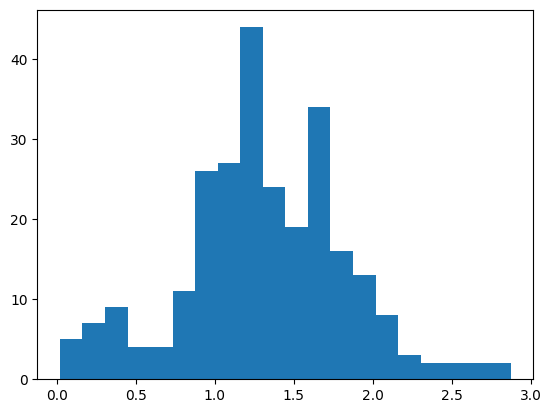

In [381]:
plt.hist(ddg,bins=20)

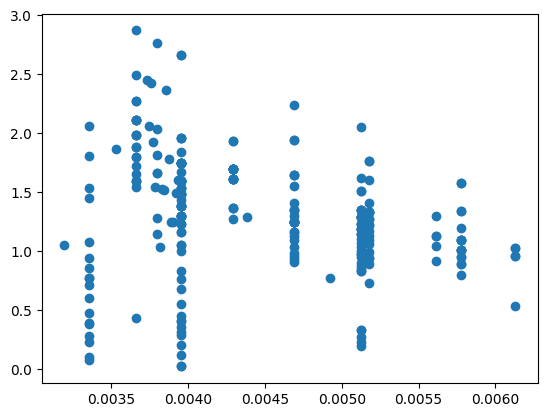

In [382]:
plt.scatter(alldesc["Temperature K"],ddg)


0.5671416317252133

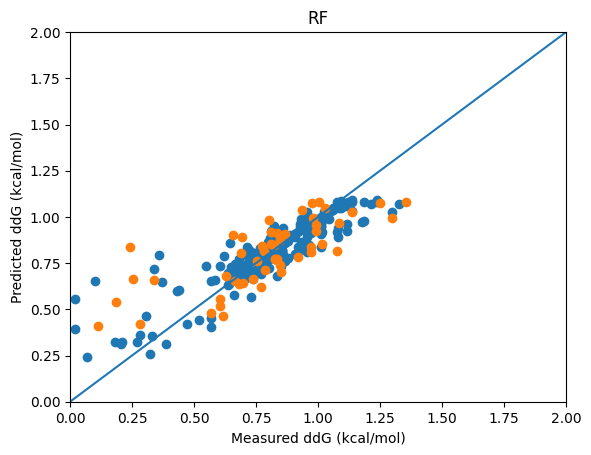

In [16]:
regressor = RandomForestRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=10).fit(xtrainscaled, np.log(ytrain+1))
ypred = regressor.predict(xtrainscaled)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(np.log(ytrain+1), ypred)
plt.scatter(np.log(ytest+1), ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
plt.xlim([0,2])
plt.plot([0,3],[0,3])
plt.ylim([0,2])
r2_score(np.log(ytest+1), ypredtest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6076013500991515

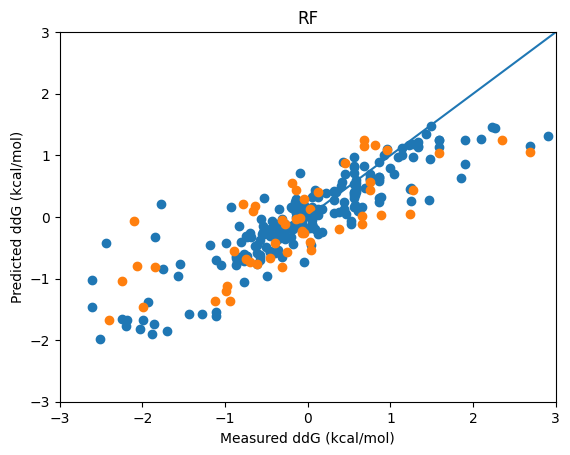

In [614]:
regressor = RandomForestRegressor(n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_depth=7).fit(xtrainscaled, ytrainstd)
ypred = regressor.predict(xtrainscaled)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(ytrainstd, ypred)
plt.scatter(yteststd, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
plt.xlim([-3,3])
plt.plot([0,3],[0,3])
plt.ylim([-3,3])
r2_score (yteststd, ypredtest)

In [615]:
feature_importances = regressor.feature_importances_

# Select top features
top_features = xtrain.columns[feature_importances.argsort()[::-1][:-1]] 
id_imp=feature_importances.argsort()[::-1][:20]
top_features


Index(['RAxis_3', 'Temperature K', 'ster3', 'Box_vol', 'min_ddg_e',
       'ExactMolWt', 'bur_vol_x', 'MolLogP', 'biggest distance', 'L_x',
       '3_crippen_y', 'MinEStateIndexelectrophile', 'sim_avg_e', 'max_ddg_e',
       'MaxPartialCharge', 'mean_polar', 'ster2', 'disp_x', 'Bmax_x', 'Vbur75',
       'qedelectrophile', 'MinPartialChargeelectrophile', 'tot_V_x', 'std_pol',
       'ster1', 'Bmin_x', 'Kappa1electrophile', 'ExactMolWtelectrophile',
       'disp_y', 'MaxPartialChargeelectrophile', 'nbur_vol',
       'MolLogPelectrophile', '4_crippen_x', '2_crippen_x', '2_crippen_y',
       'HOMO', '4_crippen_y', 'sim_avg_n', 'MolLogPnucleophile', 'nBmax', 'nL',
       'RAxis_2', 'MinPartialChargenucleophile', 'qednucleophile', 'nBmin',
       '3_crippen_x', 'Ncat_alif', 'tot_V_y', 'min_ddg_n',
       'MinEStateIndexnucleophile', 'max_ddg_n', 'MaxPartialChargenucleophile',
       'ExactMolWtnucleophile', 'Kappa1nucleophile', 'Ncat_arom'],
      dtype='object')

0.5930792096833046

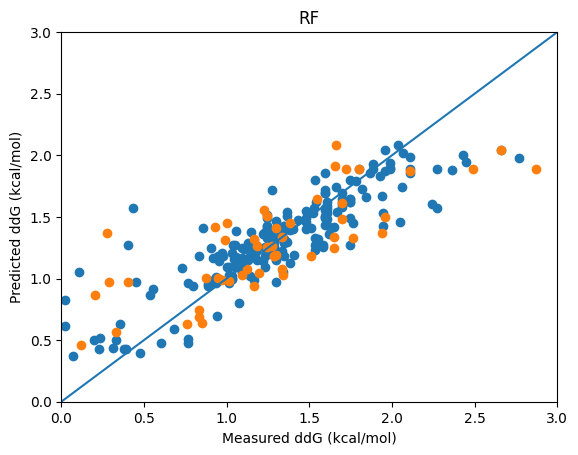

In [557]:
#xtrain, xtest, ytrain, ytest = train_test_split(alldesc[top_features], ddg, test_size=0.2, random_state=32)
#trainedscaler = StandardScaler().fit(xtrain)
#xtrainscaled = trainedscaler.transform(xtrain)
regressor = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=20).fit(xtrainscaled[:,id_imp], ytrain)
ypred = regressor.predict(xtrainscaled[:,id_imp])
#xtestscaled = trainedscaler.transform(xtest[id_imp])
ypredtest = regressor.predict(xtestscaled[:,id_imp])
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlim([0,3])
plt.plot([0,3],[0,3])

plt.ylim([0,3])
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score (ytest, ypredtest)


In [599]:
import umap
def Umap_reduc(df,n=2):
    X = df

    # Initialize UMAP with the desired number of components (target dimension)
    n_components = n  # You can adjust this based on your requirements
    umap_model = umap.UMAP(n_components=n_components)

    # Fit and transform your data
    X_umap = pd.DataFrame(umap_model.fit_transform(X))
    return X_umap


nucleophiledescriptors_r = Umap_reduc(nucleophiledescriptors,4)
"""threethreesubdescriptors_r = Umap_reduc(threethreesubdescriptors,4)
nsubdescriptors_r = Umap_reduc(nsubdescriptors,4)
electrophiledescriptors_r = Umap_reduc(nsubdescriptors,4)"""

#alldescriptors_r = electrophiledescriptors_r.join(nucleophiledescriptors_r, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors_r, rsuffix='threethreesub').join(nsubdescriptors_r, rsuffix='nsubdescriptors')



'threethreesubdescriptors_r = Umap_reduc(threethreesubdescriptors,4)\nnsubdescriptors_r = Umap_reduc(nsubdescriptors,4)\nelectrophiledescriptors_r = Umap_reduc(nsubdescriptors,4)'

0.6024386546327184

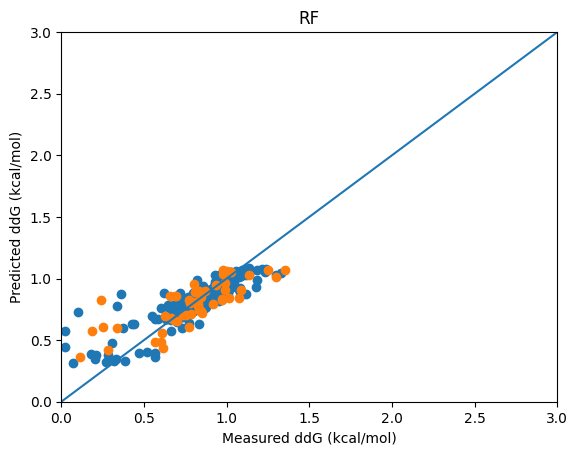

In [578]:
regressor = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=7).fit(xtrainscaled, np.log(ytrain+1))
ypred = regressor.predict(xtrainscaled)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(np.log(1+ytrain), ypred)
plt.scatter(np.log(ytest+1), ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([0,3],[0,3])

plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score (np.log(1+ytest), ypredtest)


In [18]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6,  subsample=0.8,learning_rate = 0.03,
                max_depth = 7, alpha = 0.6, n_estimators = 1000)
"""ytrainedscaler = StandardScaler().fit(np.array(ytrain).reshape(-1,1))
ytrainscaled = ytrainedscaler.transform(np.array(ytrain).reshape(-1,1))
ytestscaled = ytrainedscaler.transform(np.array(ytest).reshape(-1,1))"""
# Fit the model to the training data
xg_reg.fit(xtrainscaled[:,id_imp], ytrain)

# Predict on the test set
ypred = xg_reg.predict(xtrainscaled[:,id_imp])
ypredtest = xg_reg.predict(xtestscaled[:,id_imp])
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

NameError: name 'id_imp' is not defined

In [538]:
from sklearn.ensemble import GradientBoostingRegressor
import shap


# Create a GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.03, max_depth=5, random_state=42)

# Fit the model to the training data
gb_reg.fit(xtrainscaled, ytrain)
ypred = gb_reg.predict(xtrainscaled)
ypredtest = gb_reg.predict(xtestscaled)
# Explain the model's predictions using SHAP values
explainer = shap.Explainer(gb_reg)
shap_values = explainer.shap_values(xtest)


# Summary plot
#shap.summary_plot(shap_values, xtest)
r2_score(ytest, ypredtest)

0.5117420110635669

[15:45:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


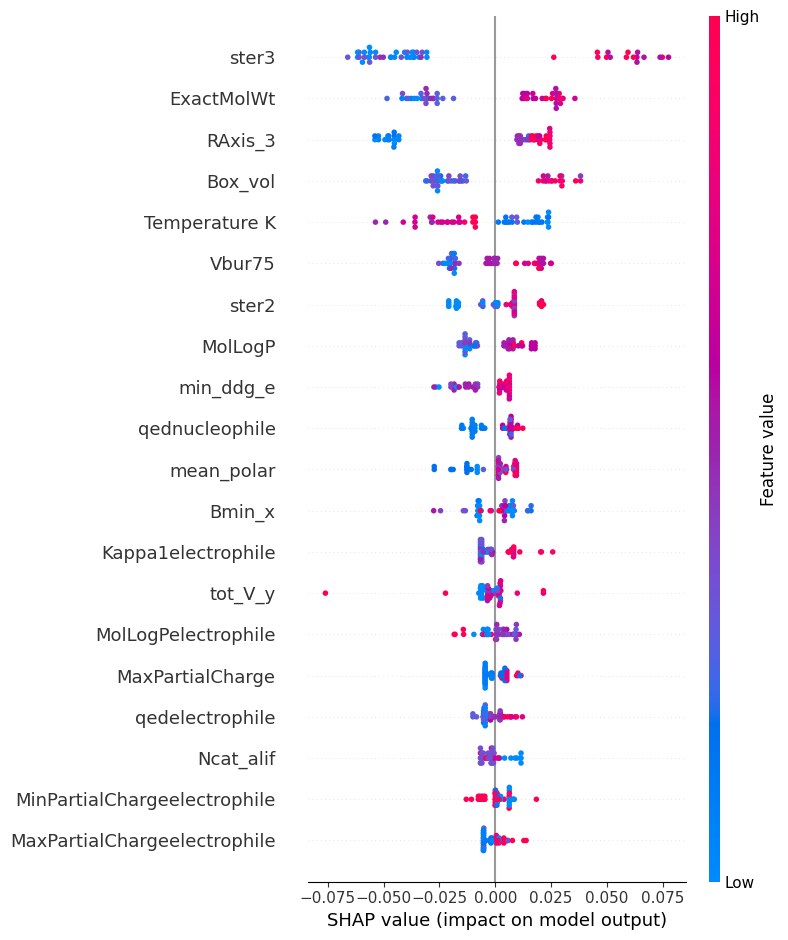

In [912]:
# Create an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model to the training data
xg_reg.fit(xtrainscaled, ytrain)

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(xtestscaled)

# Summary plot
shap.summary_plot(shap_values, xtest)

0.6242850875227623 0.12350675066495023 0.26008275002451153


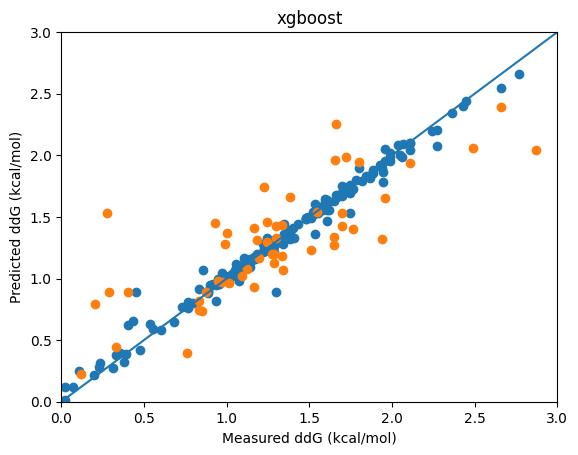

In [986]:

# Use Recursive Feature Elimination (RFE)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.05, subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000)
xg_reg = RandomForestRegressor(n_estimators=100)
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.05, subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000)
xg_reg.fit(X_train_rfe, ytrain)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.6304324462938622 0.12148596234440084 0.2776831850347864


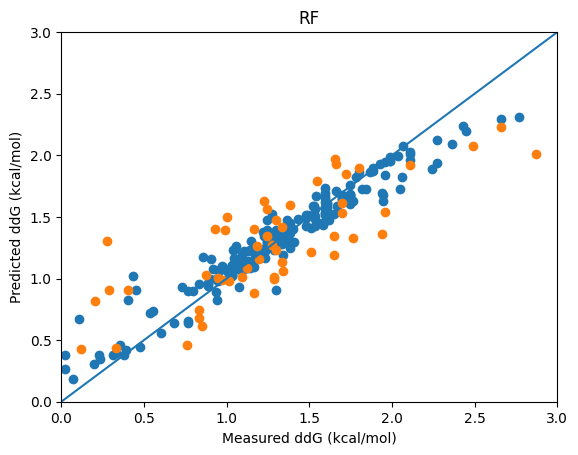

In [985]:
xg_reg = RandomForestRegressor(n_estimators=100)#
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = RandomForestRegressor(n_estimators=1000)# Fit the model to the training data with selected features
xg_reg.fit(X_train_rfe, ytrain)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')

print(r2_score(ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.5465010070610263 0.10863255957942629 0.2489892612286326


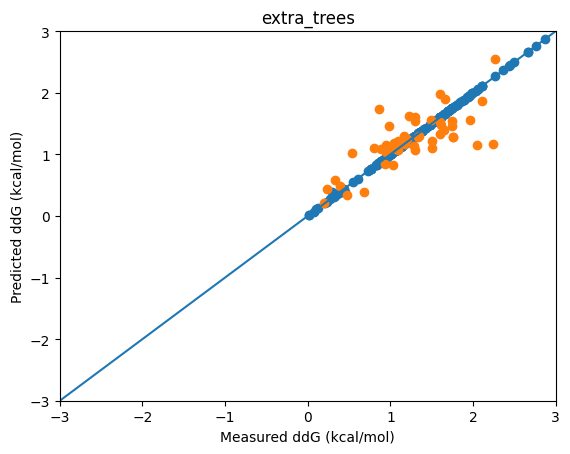

In [542]:
from sklearn.ensemble import ExtraTreesRegressor


extra_trees = ExtraTreesRegressor(n_estimators=100)
rfe = RFE(estimator=extra_trees, n_features_to_select=30)
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled) 

xg_reg =  ExtraTreesRegressor(n_estimators=100)

# Fit the model to the training data
xg_reg.fit(X_train_rfe, ytrain)

# Make predictions on the test set
ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
r2_score (ytest, ypredtest)
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.6731545670153397 0.10744214844030119 0.24808101457725995


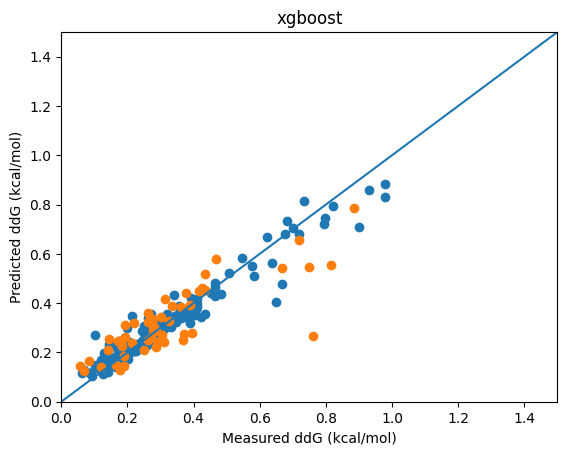

In [909]:
"""ytest_exp= np.exp(-ytest)
ytrain_exp= np.exp(-ytrain)"""
"""ytest_exp= ytest
ytrain_exp= ytrain"""
xg_reg = RandomForestRegressor(n_estimators=100)
ytest_exp= np.exp(-ytest)
ytrain_exp= np.exp(-ytrain)
# Use Recursive Feature Elimination (RFE)
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain_exp)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,  subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000)
xg_reg.fit(X_train_rfe, ytrain_exp)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain_exp, ypred)
plt.scatter(ytest_exp, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,1.5])
plt.plot([-3,3],[-3,3])
plt.ylim([0,1.5])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
r2_score (ytest_exp, ypredtest)
r2_score (ytest, -np.log(ypredtest))

print(r2_score(ytest, -np.log(ypredtest))
,mean_squared_error(ytest, -np.log(ypredtest))
,mean_absolute_error(ytest, -np.log(ypredtest)))

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() 
gpr = GaussianProcessRegressor(kernel=kernel,random_state=10).fit(xtrainscaled, ytrain)
ypred = gpr.predict(xtrainscaled)
ypredtest = gpr.predict(xtestscaled)
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])

plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score(ytest, ypredtest)

In [76]:
from scipy.stats import zscore
def remove_zscore_outliers(data, z_threshold=3):
    z_scores = np.abs(zscore(data))
    return data[(z_scores < z_threshold)]

rej = remove_zscore_outliers(xtrainscaled, z_threshold=5)

print(len(rej)/62,len(xtrainscaled))


201.6290322580645 205


In [2103]:

from sklearn.utils import resample
# Perform bootstrapping to create resampled datasets and train multiple models
num_bootstrap_samples = 30
bootstrap_models = []

for _ in range(num_bootstrap_samples):
    # Create a bootstrapped sample
    X_resampled, y_resampled = resample(xtrainscaled, ytrain, random_state=42)

    # Train a model on the resampled data
    bootstrap_model = RandomForestRegressor(n_estimators=100, random_state=42)
    bootstrap_model.fit(X_resampled, y_resampled)

    # Add the model to the list
    bootstrap_models.append(bootstrap_model)

# Make predictions on the test set using the ensemble of bootstrapped models
bootstrap_predictions = [model.predict(xtestscaled) for model in bootstrap_models]

# Average the predictions from all models
ensemble_predictions = pd.DataFrame(bootstrap_predictions).mean()

# Evaluate the performance on the bootstrapped ensemble
r2_score(ytest, ensemble_predictions)

0.559440399518626

0.575444434621126

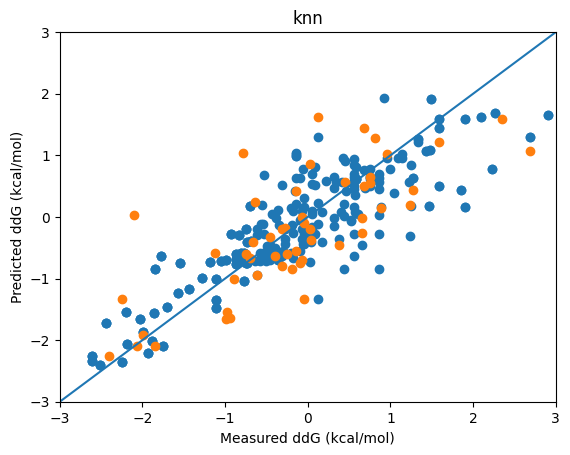

In [690]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5,weights='uniform', algorithm='auto')  # You can adjust the number of neighbors (k) based on your preference

# Fit the model
knn_regressor.fit(x_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set
ypred = knn_regressor.predict(x_train_no_outliers)
ypredtest = knn_regressor.predict(xtestscaled)
# Evaluate the model
plt.scatter(y_train_no_outliers, ypred)
plt.scatter(yteststd, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('knn')

r2_score(yteststd, ypredtest)


In [ ]:
from sklearn.linear_model import HuberRegressor



# Create a Huber Regressor model
huber_model = HuberRegressor(epsilon=20,max_iter=10000)  # epsilon is a tuning parameter



# Fit the model to the training data
huber_model.fit(xtrainscaled, ytrain)

# Make predictions on the test set
ypred = huber_model.predict(xtrainscaled)
ypredtest = huber_model.predict(xtestscaled)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
r2_score(ytest, ypredtest)

0.6029993465678347 0.13050389827217554 0.2784991354123828


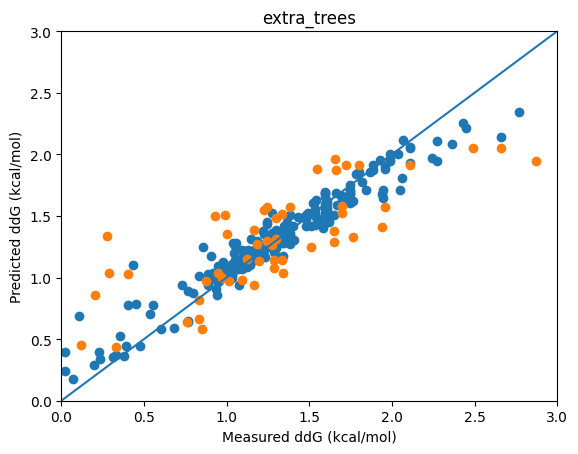

In [908]:


# Assuming X is your feature matrix and y is your target variable
# Split the data into training and testing sets

# Assign weights based on some criteria (e.g., higher weight for certain instances)
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytrain < 1] = 1
weights[ytrain > 2] = 1
# Replicate instances based on their weights
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=20)

# Fit the model on the training data with weighted sampling
rf_model.fit(X_train_weighted, y_train_weighted)

ypred = rf_model.predict(xtrainscaled)

ypredtest = rf_model.predict(xtestscaled)

# Evaluate the performance using Mean Squared Error
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.675980263304514 0.10651327243497873 0.24282087583054632


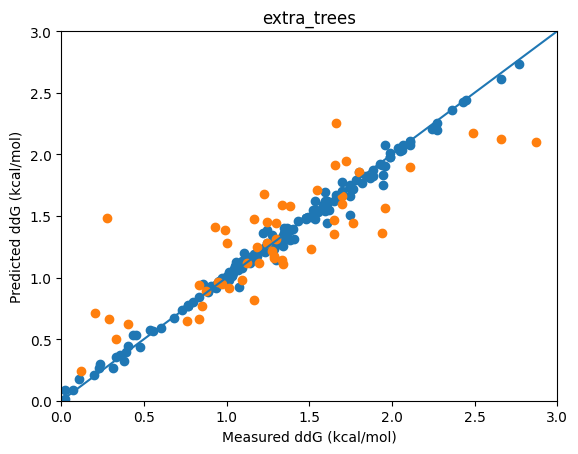

In [907]:


# Assuming X is your feature matrix and y is your target variable
# Split the data into training and testing sets

# Assign weights based on some criteria (e.g., higher weight for certain instances)
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
threshold = 0.7
weights[ytrain < 1] = 2
weights[ytrain > 2] = 2
# Replicate instances based on their weights
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))

# Create a Random Forest Regressor model
rf_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,  subsample=0.5,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000,tree_method="hist")

# Fit the model on the training data with weighted sampling
rf_model.fit(X_train_weighted, y_train_weighted)

ypred = rf_model.predict(xtrainscaled)

ypredtest = rf_model.predict(xtestscaled)

# Evaluate the performance using Mean Squared Error
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.6862760464691022 0.10312879478455748 0.24543866076776738


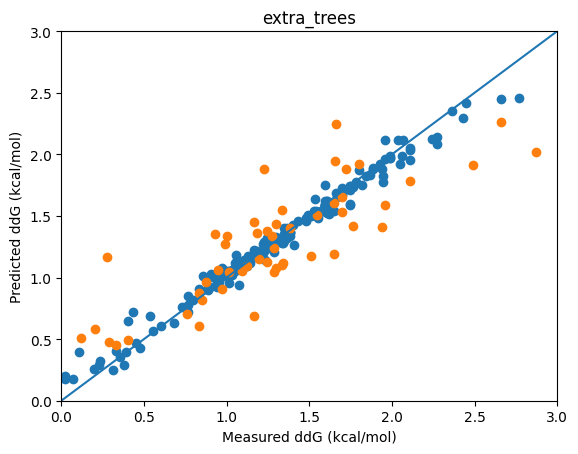

In [1067]:

# Assign weights based on some criteria (e.g., higher weight for certain instances)
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytrain < 1] = 1
weights[ytrain > 2] = 1
# Replicate instances based on their weights
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8,  learning_rate = 0.05,
                max_depth = 15, alpha = 0.5, n_estimators = 100,tree_method="hist")
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8,  learning_rate = 0.05,
                max_depth = 15, alpha = 0.5, n_estimators = 1000,tree_method="hist")
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Create a Random Forest Regressor model


# Evaluate the performance using Mean Squared Error
plt.scatter(y_train_weighted, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

In [1066]:
feature_ranking = rfe.ranking_

# Get the indices of the selected features
selected_feature_indices = np.where(feature_ranking == 1)[0]

# Use the indices to get the corresponding feature names from the original feature matrix
selected_feature_names = xtrain.columns[selected_feature_indices]

# Print or use the selected feature names as needed
print("Selected Features:", selected_feature_names)

Selected Features: Index(['Kappa1electrophile', 'MinEStateIndexelectrophile',
       'MinPartialChargeelectrophile', 'qedelectrophile',
       'ExactMolWtelectrophile', 'ExactMolWt', 'MaxPartialCharge', 'MolLogP',
       'ster3', 'Temperature K', 'biggest distance', 'L_x', 'Bmin_x', 'Bmax_x',
       'bur_vol_x', 'nbur_vol', 'tot_V_x', 'disp_y', '4_crippen_x',
       '3_crippen_y', 'std_pol', 'Box_vol', 'RAxis_3', 'simddg_e', 'num_sim_e',
       'sim_avg_e', 'min_ddg_e', 'max_ddg_e', 'simddg_n', 'sim_avg_n'],
      dtype='object')


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

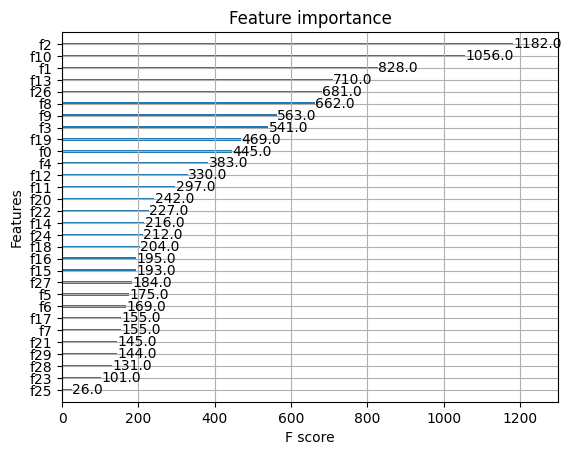

In [625]:
xgb.plot_importance(xg_reg)

In [896]:
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(X_test_rfe)

# Summary plot
shap.summary_plot(shap_values, X_test_rfe)

[15:38:56] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/shap/shap/issues/580.

0.639030662975694 0.11865951663085589 0.2662207813250582


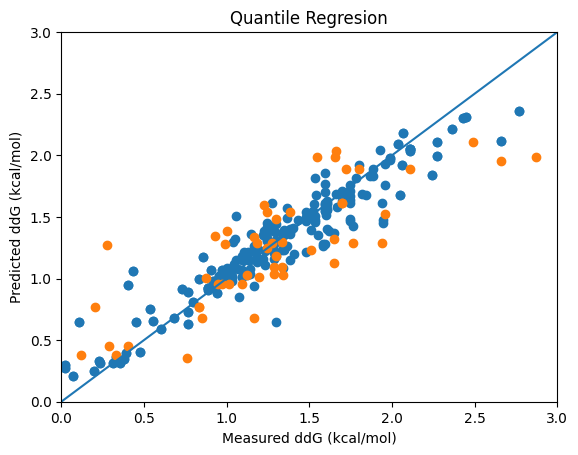

In [1065]:
from quantile_forest import RandomForestQuantileRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=0,shuffle=True)

qrf = RandomForestQuantileRegressor(n_estimators = 100,max_depth=20, min_samples_leaf=4, min_samples_split= 5)

rfe = RFE(estimator=qrf, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)

qrf = RandomForestQuantileRegressor(n_estimators = 1000,max_depth=20, min_samples_leaf=4, min_samples_split= 5)
qrf.fit(X_train_rfe, y_train_weighted)

# Make predictions on the test set
ypred = qrf.predict(X_train_rfe, quantiles=[0.25, 0.5, 0.75])
ypred2 = (ypred[:,2] + 2*ypred[:,1] + ypred[:,0])/4

ypredtest = qrf.predict(X_test_rfe, quantiles=[0.25, 0.5, 0.75])
ypredtest2 = (ypredtest[:,1] + 2*ypredtest[:,1] + ypredtest[:,1])/4
# Evaluate the model
plt.scatter(y_train_weighted, ypred2)
plt.scatter(ytest, ypredtest2)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('Quantile Regresion')
print(r2_score (ytest, ypredtest2)
,mean_squared_error(ytest, ypredtest2)
,mean_absolute_error(ytest, ypredtest2))

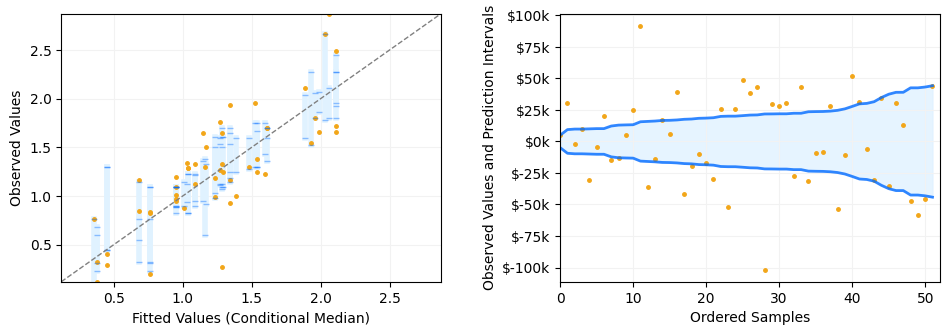

In [628]:

from matplotlib.ticker import FuncFormatter
y_true = []
y_pred = []
y_pred_low = []
y_pred_upp = []
y_true = np.concatenate((y_true, ytest))
y_pred = np.concatenate((y_pred, ypredtest2))
y_pred_low = np.concatenate((y_pred_low, ypredtest[:, 0]))
y_pred_upp = np.concatenate((y_pred_upp, ypredtest[:, 2]))

def plot_calibration_and_intervals(y_true, y_pred, y_pred_low, y_pred_upp):
    def plot_calibration(ax, y_true, y_pred_low, y_pred_upp, price_formatter):
        for low, mid, upp in zip(y_pred_low, y_pred, y_pred_upp):
            ax.plot([mid, mid], [low, upp], lw=4, c="#e0f2ff")

        ax.plot(y_pred, y_true, c="#f2a619", lw=0, marker=".", ms=5)
        ax.plot(y_pred, y_pred_low, alpha=0.4, c="#006aff", lw=0, marker="_", ms=4)
        ax.plot(y_pred, y_pred_upp, alpha=0.4, c="#006aff", lw=0, marker="_", ms=4)

        lims = [
            np.min(np.minimum(y_true, y_pred)),  # min of both axes
            np.max(np.maximum(y_true, y_pred)),  # max of both axes
        ]
        ax.plot(lims, lims, ls="--", lw=1, c="grey")
        ax.grid(axis="x", color="0.95")
        ax.grid(axis="y", color="0.95")

        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.set_xlabel("Fitted Values (Conditional Median)")
        ax.set_ylabel("Observed Values")

    def plot_intervals(ax, y_true, y_pred_low, y_pred_upp, price_formatter):
        # Center data, with the mean of the prediction interval at 0.
        mean = (y_pred_low + y_pred_upp) / 2
        y_true -= mean
        y_pred_low -= mean
        y_pred_upp -= mean

        ax.plot(y_true, c="#f2a619", lw=0, marker=".", ms=5)
        ax.fill_between(
            np.arange(len(y_pred_upp)),
            y_pred_low,
            y_pred_upp,
            alpha=0.8,
            color="#e0f2ff",
        )
        ax.plot(np.arange(len(y_true)), y_pred_low, alpha=0.8, c="#006aff", lw=2)
        ax.plot(np.arange(len(y_true)), y_pred_upp, alpha=0.8, c="#006aff", lw=2)
        ax.grid(axis="x", color="0.95")
        ax.grid(axis="y", color="0.95")
        ax.yaxis.set_major_formatter(price_formatter)
        ax.set_xlim([0, len(y_true)])
        ax.set_xlabel("Ordered Samples")
        ax.set_ylabel("Observed Values and Prediction Intervals")

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    usd_formatter = FuncFormatter(lambda x, p: f"${format(int(x * 100), ',')}k")

    y_pred_interval = y_pred_upp - y_pred_low
    sort_idx = np.argsort(y_pred)
    y_true = y_true[sort_idx]
    y_pred = y_pred[sort_idx]
    y_pred_low = y_pred_low[sort_idx]
    y_pred_upp = y_pred_upp[sort_idx]

    plot_calibration(ax1, y_true, y_pred_low, y_pred_upp, usd_formatter)

    y_pred_interval = y_pred_upp - y_pred_low
    sort_idx = np.argsort(y_pred_interval)
    y_true = y_true[sort_idx]
    y_pred_low = y_pred_low[sort_idx]
    y_pred_upp = y_pred_upp[sort_idx]

    plot_intervals(ax2, y_true, y_pred_low, y_pred_upp, usd_formatter)

    plt.subplots_adjust(top=0.15)
    fig.tight_layout(pad=3)

    plt.show()


plot_calibration_and_intervals(y_true, y_pred, y_pred_low, y_pred_upp)

In [ ]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05,n_estimators = 1000)

# Fit the model and obtain outlier scores
outlier_scores = isolation_forest.fit_predict(xtrainscaled)

# Identify outliers (points with score of -1)
outlier_indices = np.where(outlier_scores == -1)[0]



outlier_scores2 = isolation_forest.predict(xtestscaled)
outlier_indices2 = np.where(outlier_scores2 == -1)[0]

# Scatter plot of the feature matrix
"""plt.scatter(ytrain, ypred, label='Inliers', color='blue')

# Highlight outliers in red
plt.scatter(ytrain.values[outlier_indices], ypred[outlier_indices], label='Outliers', color='red')"""

plt.scatter(ytest, ypredtest, label='Inliers', color='blue')

# Highlight outliers in red
plt.scatter(ytest.values[outlier_indices2], ypredtest[outlier_indices2], label='Outliers', color='orange')


plt.show()

0.6428787572357699 0.11739455321702487 0.2596020301229422


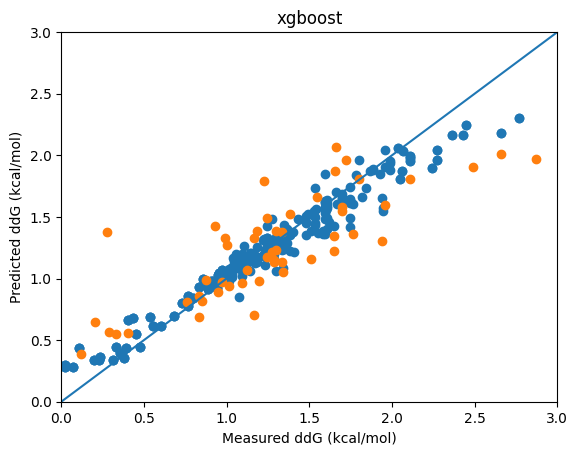

In [1064]:
x_train_no_outliers = xtrainscaled
y_train_no_outliers = ytrain
weights = np.ones_like(y_train_no_outliers)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
threshold = 0.7
weights[y_train_no_outliers < 1] = 3
weights[y_train_no_outliers > 2] = 2
# Replicate instances based on their weights
x_train_no_outliers = np.repeat(x_train_no_outliers, weights.astype(int), axis=0)
y_train_no_outliers = np.repeat(y_train_no_outliers, weights.astype(int))

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.01, subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 100)
xg_reg.fit(x_train_no_outliers, y_train_no_outliers)

ypred = xg_reg.predict(x_train_no_outliers)
ypredtest = xg_reg.predict(xtestscaled)
# Evaluate the model
plt.scatter(y_train_no_outliers, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
print(r2_score(ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.6176183440777308 0.12569827352728163 0.2695055789113499


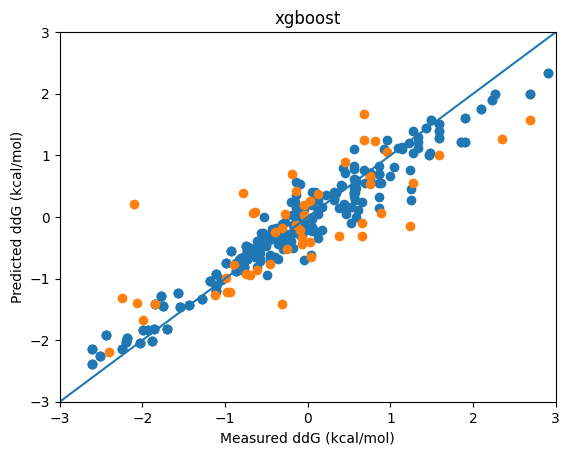

In [1063]:
y_train_no_outliers = ytrain
weights = np.ones_like(y_train_no_outliers)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
threshold = 0.7
weights[y_train_no_outliers < 1] = 3
weights[y_train_no_outliers > 2] = 2
# Replicate instances based on their weights
x_train_no_outliers = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_no_outliers = np.repeat(ytrainstd, weights.astype(int))

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.01, subsample=0.7,learning_rate = 0.05,
                max_depth = 4, alpha = 0.5, n_estimators = 100)
xg_reg.fit(x_train_no_outliers, y_train_no_outliers)

ypred = xg_reg.predict(x_train_no_outliers)
ypredtest = xg_reg.predict(xtestscaled)
# Evaluate the model
plt.scatter(y_train_no_outliers, ypred)
plt.scatter(yteststd, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
ypredtest = trainedscaler1.inverse_transform(ypredtest.reshape(-1, 1))
print(r2_score(ytest, ypredtest),mean_squared_error(ytest, ypredtest), mean_absolute_error(ytest, ypredtest))

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Assuming X and y are your feature matrix and target variable
X, y = make_regression(n_samples=100, n_features=30, random_state=42)

# Create XGBoost regressor
xgb_model = XGBRegressor()

# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7, 10, 12, 15],
    'alpha': [0, 0.1, 0.3, 0.5, 0.7, 1],  # Regularization term
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Create GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,  scoring='neg_mean_absolute_error', cv=10)
xgb_grid_search.fit(xtrainscaled, ytrain)

# Print the best parameters and corresponding score
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best Score for XGBoost:", -xgb_grid_search.best_score_)


In [27]:
from sklearn.pipeline import Pipeline
import scipy.stats as stats
xgb_param_grid = {
    'alpha': stats.uniform(0.4, 1.6),  
    'n_estimators': stats.randint(150, 1500),
    'learning_rate': stats.uniform(0.1, 0.59),
    'subsample': stats.uniform(0.3, 0.7),
    'max_depth': [7,  9, 11, 12],
    'max_leaves': [None, 10, 20, 30],  # Add the values for max_leaves
    'max_bin': [None, 100, 200, 300],  # Add the values for max_bin
    'colsample_bytree': stats.uniform(0.3, 0.7),
    'min_child_weight': [1, 2, 3, 4]
    
}
xg_reg1 = xgb.XGBRegressor(objective='reg:squarederror')
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
n_features_to_select_range = [25, 30 ,35]
# Create a pipeline with RFE and XGBoost
pipeline = Pipeline([
    ('rfe', RFE(estimator=xg_reg)),
    ('xgb', xg_reg)
])

# Perform GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=dict(
        rfe__n_features_to_select=n_features_to_select_range,
        **{'xgb__' + key: value for key, value in xgb_param_grid.items()}
    ),
    scoring='neg_mean_squared_error',n_iter=5000,
    cv=5
)
grid_search.fit(xtrainscaled, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'rfe__n_features_to_select': 25, 'xgb__alpha': 1.1019707178946314, 'xgb__colsample_bytree': 0.30552611716401995, 'xgb__learning_rate': 0.15011064066453686, 'xgb__max_bin': 200, 'xgb__max_depth': 11, 'xgb__max_leaves': 30, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 420, 'xgb__subsample': 0.8017839472716133}


In [28]:
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

weights[ytrain < 1] = 2
weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xgb_param_grid = {
    'alpha': stats.uniform(0.4, 1.6),  
    'n_estimators': stats.randint(150, 1500),
    'learning_rate': stats.uniform(0.1, 0.59),
    'subsample': stats.uniform(0.3, 0.7),
    'max_depth': [  7,  9, 11, 12],
    'max_leaves': [None, 10, 20, 30],  # Add the values for max_leaves
    'max_bin': [None, 100, 200, 300],  # Add the values for max_bin
    'colsample_bytree': stats.uniform(0.4, 0.6),
    'min_child_weight': [1, 2, 3, 4]
    
}
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
n_features_to_select_range = [25, 30 ,35]
# Create a pipeline with RFE and XGBoost
pipeline = Pipeline([
    ('rfe', RFE(estimator=xg_reg)),
    ('xgb', xg_reg)
])

# Perform GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=dict(
        rfe__n_features_to_select=n_features_to_select_range,
        **{'xgb__' + key: value for key, value in xgb_param_grid.items()}
    ),
    scoring='neg_mean_squared_error',n_iter=5000,
    cv=5
)

grid_search.fit(X_train_weighted, y_train_weighted)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'rfe__n_features_to_select': 25, 'xgb__alpha': 0.5172751293232674, 'xgb__colsample_bytree': 0.7358067860872892, 'xgb__learning_rate': 0.31470286220847504, 'xgb__max_bin': 300, 'xgb__max_depth': 12, 'xgb__max_leaves': 30, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 607, 'xgb__subsample': 0.9240648009517585}


0.7041989172273427 0.09723710548390391 0.23202388612782368
0.5443806526843284 0.05232008904944091 0.17785669827082387


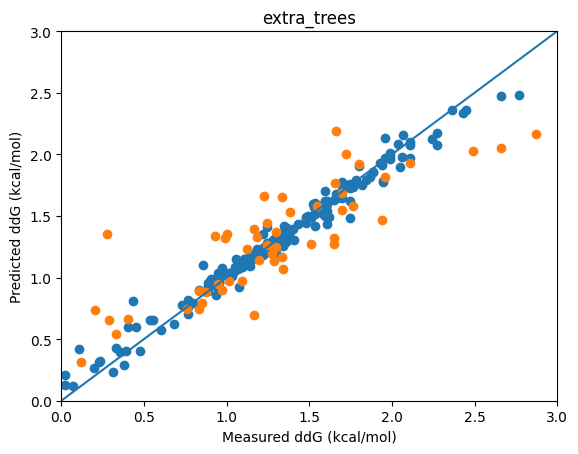

In [33]:
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially
from sklearn.feature_selection import RFECV
#Best Hyperparameters: {'rfe__n_features_to_select': 35, 'xgb__alpha': 0.9181718655253887, 
# 'xgb__colsample_bytree': 0.7377364278221021, 'xgb__gamma': 1.0184829442444696, 
# 'xgb__learning_rate': 0.5109115614231006, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 655, 
# 'xgb__subsample': 0.7342405515427555}
#Weighted Best Hyperparameters: {'rfe__n_features_to_select': 30, 'xgb__alpha': 1.6004253340568906, 'xgb__colsample_bytree': 0.6362343432698547, 'xgb__gamma': 0.2181305532875271, 'xgb__learning_rate': 0.2770344813645423, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 959, 'xgb__subsample': 0.8385011861569944}
#weights[ytrain < 1] = 2
#weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.74,  subsample=0.73,  learning_rate = 0.051,
                max_depth = 10, alpha =0.92 , n_estimators = 300,min_child_weight= 1)
rfe = RFE(estimator=xg_reg, n_features_to_select=35)  # Set the desired number of features
#rfe = RFECV(estimator=xg_reg, min_features_to_select=20, cv=10)
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.74,  subsample=0.73,  learning_rate = 0.051, 
               max_depth = 10, alpha =0.92, n_estimators = 655,min_child_weight=1)
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)


plt.scatter(y_train_weighted, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

weights = np.ones_like(ytest)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytest < 0.75] = 0
weights[ytest > 2.25] = 0
# Replicate instances based on their weights
ytest_mid = np.repeat(ytest, weights.astype(int))
ypredtest_mid = np.repeat(ypredtest, weights.astype(int))

print(r2_score(ytest_mid ,ypredtest_mid)
,mean_squared_error(ytest_mid, ypredtest_mid)
,mean_absolute_error(ytest_mid, ypredtest_mid))

0.6960248610431603 0.09992411918906866 0.24774485707924326
0.48261588299962055 0.05941271641274552 0.1995280204943652


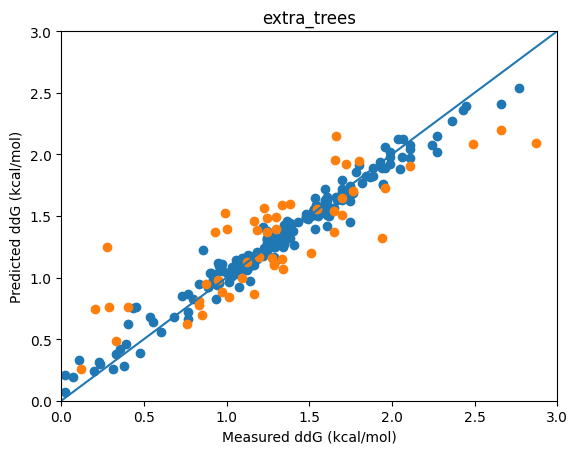

In [28]:
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially
from sklearn.feature_selection import RFECV


"""Best Hyperparameters: {'rfe__n_features_to_select': 35, 'xgb__alpha': 0.48918448715821283, 
'xgb__colsample_bytree': 0.3974345436891865, 'xgb__learning_rate': 0.014941356936242815, 'xgb__max_depth': 9, 
'xgb__min_child_weight': 2, 'xgb__n_estimators': 396, 'xgb__subsample': 0.5028949381854623, 'xgb__xgb__max_bin': 100, 
'xgb__xgb__max_leaves': 30}

"""


#weights[ytrain < 1] = 2
#weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4,  subsample=0.5,  learning_rate = 0.045,
                max_depth = 9, alpha =0.75 , n_estimators = 396,min_child_weight= 2,max_bin=100,max_leaves=30)
rfe = RFE(estimator=xg_reg, n_features_to_select=35)  # Set the desired number of features
#rfe = RFECV(estimator=xg_reg, min_features_to_select=20, cv=10)
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4,  subsample=0.5,  learning_rate = 0.045,
                max_depth = 9, alpha =0.75 , n_estimators = 800,min_child_weight= 2,max_bin=100,max_leaves=30)
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)


plt.scatter(y_train_weighted, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

weights = np.ones_like(ytest)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytest < 0.75] = 0
weights[ytest > 2.25] = 0
# Replicate instances based on their weights
ytest_mid = np.repeat(ytest, weights.astype(int))
ypredtest_mid = np.repeat(ypredtest, weights.astype(int))

print(r2_score(ytest_mid ,ypredtest_mid)
,mean_squared_error(ytest_mid, ypredtest_mid)
,mean_absolute_error(ytest_mid, ypredtest_mid))

In [21]:
feature_ranking = rfe.ranking_

# Get the indices of the selected features
selected_feature_indices = np.where(feature_ranking == 1)[0]

# Use the indices to get the corresponding feature names from the original feature matrix
selected_feature_names = xtrain.columns[selected_feature_indices]

# Print or use the selected feature names as needed
print("Selected Features:", selected_feature_names,len(selected_feature_names))


Selected Features: Index(['Kappa1electrophile', 'MaxPartialChargenucleophile',
       'MinEStateIndexelectrophile', 'MinPartialChargeelectrophile',
       'MolLogPelectrophile', 'MolLogPnucleophile', 'ExactMolWtelectrophile',
       'ExactMolWt', 'MolLogP', 'ster2', 'ster3', 'HOMO', 'Temperature K',
       'mean_polar', 'biggest distance', 'Bmin_x', 'Bmax_x', 'bur_vol_x',
       'nBmin', 'nBmax', 'nbur_vol', 'disp_x', 'Vbur75', 'tot_V_y', 'disp_y',
       '2_crippen_x', '4_crippen_x', '2_crippen_y', '3_crippen_y', 'Box_vol',
       'RAxis_3', 'Ncat_alif', 'min_ddg_e', 'sim_avg_n', 'max_ddg_n'],
      dtype='object') 35


In [43]:
np.mean(result['Temperature K'])

229.34455252918295

In [58]:
from itertools import product
key_columns = ['nucleophile SMILES', 'electrophile SMILES', '3,3â€™ Catalyst Substituent ', 'N Catalyst Substituent']

# Create a new DataFrame to store the appended combinations
result_df = pd.DataFrame()


# Iterate through each combination

unique_values = [alldesc[col].unique() for col in key_columns]

# Generate all combinations of unique values

combinations_unique_values = list(product(*unique_values))

# Create a new DataFrame to store the combinations
comb_df = pd.DataFrame(combinations_unique_values, columns=key_columns)


# Display the result DataFrame
df1 = alldesc[['nucleophile SMILES','Kappa1nucleophile','MaxPartialChargenucleophile','MinEStateIndexnucleophile','MinPartialChargenucleophile','MolLogPnucleophile','qednucleophile','ExactMolWtnucleophile',
               'nL', 'nBmin', 'nBmax','nbur_vol','tot_V_y', 'disp_y','2_crippen_x', '3_crippen_x', '4_crippen_x']].drop_duplicates()
df2 = alldesc[['electrophile SMILES','Kappa1electrophile','MaxPartialChargeelectrophile','MinEStateIndexelectrophile','MinPartialChargeelectrophile','MolLogPelectrophile','qedelectrophile','ExactMolWtelectrophile',
               'L_x', 'Bmin_x', 'Bmax_x', 'bur_vol_x','tot_V_x', 'disp_x','2_crippen_y','3_crippen_y', '4_crippen_y']].drop_duplicates()
df3 = alldesc[['3,3â€™ Catalyst Substituent ','ExactMolWt', 'MaxPartialCharge', 'MolLogP', 'fr_C_S', 'ster1', 'ster2',
                'ster3', 'HOMO',  'mean_polar', 'biggest distance','Vbur75' ,'std_pol', 'Box_vol', 'RAxis_2','RAxis_3']].drop_duplicates()
df4 = alldesc[['N Catalyst Substituent','Ncat_alif', 'Ncat_arom']].drop_duplicates()

combinations_df = pd.merge(comb_df ,df1, on='nucleophile SMILES', how='left')
combinations_df = pd.merge(combinations_df, df2, on='electrophile SMILES', how='left')
combinations_df = pd.merge(combinations_df, df3, on='3,3â€™ Catalyst Substituent ', how='left')
combinations_df = pd.merge(combinations_df, df4, on='N Catalyst Substituent', how='left')

xtrain0, x_comb = preprocess(xtrain_pre, combinations_df ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7)
x_comb['Temperature K']=xtrain['Temperature K'].value_counts().idxmax()


# Reorder columns 
df1_reordered = x_comb[xtrain.columns]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(xtrain)
VD_X_df = pd.DataFrame(rfe.transform(minmax_scaler.transform(df1_reordered )))
Comb_df = pd.concat([comb_df,VD_X_df], axis=1)
Comb_df.to_csv("sterimol/Virtualdataset.csv")

/tmp/ipykernel_2076757/3173373465.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2076757/3173373465.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2076757/3173373465.py:49: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2076757/3173373465.py:50: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2076757/3173373465.py:66: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2076757/3173373465.py:68: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2076757/3173373465.py:71: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2076757/3173373465.py:73: RuntimeWarning:

Mean of empty slice



In [59]:

unique_values = [alldesc[col].unique() for col in ['nucleophile SMILES', 'electrophile SMILES']]

# Generate all combinations of unique values

combinations_unique_values = list(product(*unique_values))

# Create a new DataFrame to store the combinations
comb_df2 = pd.DataFrame(combinations_unique_values, columns=['nucleophile SMILES', 'electrophile SMILES'])



# Display the result DataFrame
df1 = alldesc[['nucleophile SMILES','Kappa1nucleophile','MaxPartialChargenucleophile','MinEStateIndexnucleophile','MinPartialChargenucleophile','MolLogPnucleophile','qednucleophile','ExactMolWtnucleophile',
               'nL', 'nBmin', 'nBmax','nbur_vol','tot_V_y', 'disp_y','2_crippen_x', '3_crippen_x', '4_crippen_x']].drop_duplicates()
df2 = alldesc[['electrophile SMILES','Kappa1electrophile','MaxPartialChargeelectrophile','MinEStateIndexelectrophile','MinPartialChargeelectrophile','MolLogPelectrophile','qedelectrophile','ExactMolWtelectrophile',
               'L_x', 'Bmin_x', 'Bmax_x', 'bur_vol_x','tot_V_x', 'disp_x','2_crippen_y','3_crippen_y', '4_crippen_y']].drop_duplicates()
combinations_df = pd.merge(comb_df2 ,df1, on='nucleophile SMILES', how='left')

combinations_df = pd.merge(combinations_df,df2, on='electrophile SMILES', how='left')

import umap
def Umap_reduc(df,num_reactions,n=2):
    X = df

    #

    umap_model = umap.UMAP(n_components=n,min_dist=0.1,  
    n_neighbors=num_reactions)

    # Fit and transform your data
    X_umap = pd.DataFrame(umap_model.fit_transform(X))
    return X_umap


raect_reduced = Umap_reduc(combinations_df[combinations_df.columns[2:]],len(combinations_df)//2 ,5)
 

In [24]:
import plotly.express as px

range_, inertia = get_clusters(raect_reduced,100)
fig = px.scatter(x=range_, y=inertia,
                labels={'x':'# of Clusters', 'y':'Inertia'},
                template='simple_white'
                )

fig.update_traces(marker=dict(size=17,
                              line=dict(width=2,
                                        color='Black')),
                  selector=dict(mode='markers'))

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_yaxes(range=[0,5000], row=1, col=1)

fig.update_layout(
    font_size=20,
)

fig.show()

In [60]:

labels = k_cluster(combinations_df[combinations_df.columns[2:]],50)


In [61]:

combinations_df=pd.concat([combinations_df[combinations_df.columns[:2]],pd.DataFrame({'cluster':labels})],axis=1)

In [22]:
result['3,3â€™ Catalyst Substituent '].value_counts()

3,3â€™ Catalyst Substituent 
CC(C)(C)c1ccccc1                                          27
CC3(C)c1ccccc1c2ccccc23                                   24
c3ccc2ccc1ccccc1c2c3                                      23
FC(F)(F)c1cccc(C(F)(F)F)c1                                23
FS(F)(F)(F)(F)c1ccccc1                                    19
c1ccccc1                                                  17
FC(F)(F)C(F)(F)C(F)(F)c1cccc(C(F)(F)C(F)(F)C(F)(F)F)c1    16
c4ccc3c1ccccc1c2ccccc2c3c4                                15
c2cccc(c1ccccc1)c2                                        14
CCCCCCc1cccc(CCCCCC)c1                                    14
c2ccc1ccccc1c2                                            13
c4ccc3c1ccccc1C2(CCCC2)c3c4                               11
FS(F)(F)(F)(F)c1cccc(S(F)(F)(F)(F)F)c1                    11
CCCc1cccc(CCC)c1                                           5
Cc1cccc(C)c1C                                              5
Cc1cc(C)c2ccc4cccc3ccc1c2c34                            

In [1]:
VD_ypred['nucleophile SMILES']

NameError: name 'VD_ypred' is not defined

In [63]:
VD_ypred = {'ddg':xg_reg.predict(VD_X_df)}
VD_pred = pd.concat([comb_df,pd.DataFrame(VD_ypred)], axis=1)
rt=1/xtrain['Temperature K'].value_counts().idxmax()*1.988*10**(-3)
VD_pred['ee'] = 1-2*np.exp(-VD_pred['ddg']/rt)
VD_pred=pd.merge(VD_pred,combinations_df,on=['nucleophile SMILES', 'electrophile SMILES'], how='left')
VD_pred.to_csv("sterimol/Virtualpredictions.csv")

In [64]:
np.mean(VD_pred['ee'])

0.82503426

In [55]:
np.mean(VD_pred['ee'])

1-2*np.exp(-1.30047332921237/(253.15*1.988*10**(-3)))

0.8490701108677218

In [1140]:
#@title XGBQuantile Class
from xgboost.sklearn import XGBRegressor
#@title Imports and Utilities

#standard
import numpy as np

import pandas as pd
import scipy

#ML
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

#utils
from functools import partial

#plotting libs
import matplotlib.pyplot as plt
import seaborn as sns



def plot_result(X_train,y_train,X_test,y_test,y_upper,y_lower):
  
 
  plt.plot(X_test,y_test, 'g:', label=u'$f(x) = x\,\sin(x)$')
  plt.plot(X_train,y_train, 'b.', markersize=10, label=u'Observations')
  plt.plot(X_test, y_pred, 'r-', label=u'Prediction')
  plt.plot(X_test, y_upper, 'k-')
  plt.plot(X_test, y_lower, 'k-')
  plt.fill(np.concatenate([X_test, X_test[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.ylim(-10 , 20)
  plt.legend(loc='upper left')
  

class XGBQuantile(XGBRegressor):
  def __init__(self,quant_alpha=0.95,quant_delta = 1.0,quant_thres=1.0,quant_var =1.0,base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,max_depth=3, min_child_weight=1,  n_estimators=100,
                n_jobs=1,  objective='reg:linear', random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1):
    self.quant_alpha = quant_alpha
    self.quant_delta = quant_delta
    self.quant_thres = quant_thres
    self.quant_var = quant_var
    
    super().__init__(base_score=base_score, booster=booster, colsample_bylevel=colsample_bylevel,
       colsample_bytree=colsample_bytree, gamma=gamma, learning_rate=learning_rate, max_delta_step=max_delta_step,
       max_depth=max_depth, min_child_weight=min_child_weight, n_estimators=n_estimators,
       n_jobs= n_jobs, objective=objective, random_state=random_state,
       reg_alpha=reg_alpha, reg_lambda=reg_lambda, scale_pos_weight=scale_pos_weight, subsample=subsample)
    
    self.test = None
  
  def fit(self, X, y):
    super().set_params(objective=partial(XGBQuantile.quantile_loss,alpha = self.quant_alpha,delta = self.quant_delta,threshold = self.quant_thres,var = self.quant_var) )
    super().fit(X,y)
    return self
  
  def predict(self,X):
    return super().predict(X)
  
  def score(self, X, y):
    y_pred = super().predict(X)
    score = XGBQuantile.quantile_score(y, y_pred, self.quant_alpha)
    score = 1./score
    return score
      
  @staticmethod
  def quantile_loss(y_true,y_pred,alpha,delta,threshold,var):
    x = y_true - y_pred
    grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-  ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
    hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
 
    grad = (np.abs(x)<threshold )*grad - (np.abs(x)>=threshold )*(2*np.random.randint(2, size=len(y_true)) -1.0)*var
    hess = (np.abs(x)<threshold )*hess + (np.abs(x)>=threshold )
    return grad, hess
  
  @staticmethod
  def original_quantile_loss(y_true,y_pred,alpha,delta):
    x = y_true - y_pred
    grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
    hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
    return grad,hess

  
  @staticmethod
  def quantile_score(y_true, y_pred, alpha):
    score = XGBQuantile.quantile_cost(x=y_true-y_pred,alpha=alpha)
    score = np.sum(score)
    return score
  
  @staticmethod
  def quantile_cost(x, alpha):
    return (alpha-1.0)*x*(x<0)+alpha*x*(x>=0)
  
  @staticmethod
  def get_split_gain(gradient,hessian,l=1):
    split_gain = list()
    for i in range(gradient.shape[0]):
      split_gain.append(np.sum(gradient[:i])/(np.sum(hessian[:i])+l)+np.sum(gradient[i:])/(np.sum(hessian[i:])+l)-np.sum(gradient)/(np.sum(hessian)+l) )
    
    return np.array(split_gain)

    
 

In [1123]:
#@title Imports and Utilities

#standard
import numpy as np
import pandas as pd
import scipy

#ML
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

#utils
from functools import partial

#plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

def generate_data():
  """
  Generates data sample as seen in "Prediction Intervals for Gradient Boosting Regression"
  (https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html)
  """
  np.random.seed(1)
  f = lambda u: u*np.sin(u)
  
  #  First the noiseless case
  X_train = np.atleast_2d(np.random.uniform(0, 10.0, size=100)).T
  X_train = X_train.astype(np.float32)

  # Observations
  y_train = f(X_train).ravel()
  dy = 1.5 + 1.0 * np.random.random(y_train.shape)
  noise = np.random.normal(0, dy)
  y_train += noise
  y_train = y_train.astype(np.float32)
  
  # Mesh the input space for evaluations of the real function, the prediction and
  # its MSE
  X_test = np.atleast_2d(np.linspace(0, 10.0, 1000)).T
  X_test = X_test.astype(np.float32)
  y_test = f(X_test).ravel()
  

  return X_train,y_train,X_test,y_test

def collect_prediction(X_train,y_train,X_test,y_test,estimator,alpha,model_name):
  estimator.fit(X_train,y_train)
  y_pred = estimator.predict(X_test)
  print( "{model_name} alpha = {alpha:.2f},score = {score:.1f}".format(model_name=model_name, alpha=alpha , score= XGBQuantile.quantile_score(y_test, y_pred, alpha)) )

  return y_pred
def plot_result(X_train,y_train,X_test,y_test,y_upper,y_lower):
  
 
  plt.plot(X_test,y_test, 'g:', label=u'$f(x) = x\,\sin(x)$')
  plt.plot(X_train,y_train, 'b.', markersize=10, label=u'Observations')
  plt.plot(X_test, y_pred, 'r-', label=u'Prediction')
  plt.plot(X_test, y_upper, 'k-')
  plt.plot(X_test, y_lower, 'k-')
  plt.fill(np.concatenate([X_test, X_test[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.ylim(-10 , 20)
  plt.legend(loc='upper left')
  

[10:18:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "quant_alpha", "quant_delta", "quant_thres", "quant_var" } are not used.

[10:18:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "quant_alpha", "quant_delta", "quant_thres", "quant_var" } are not used.



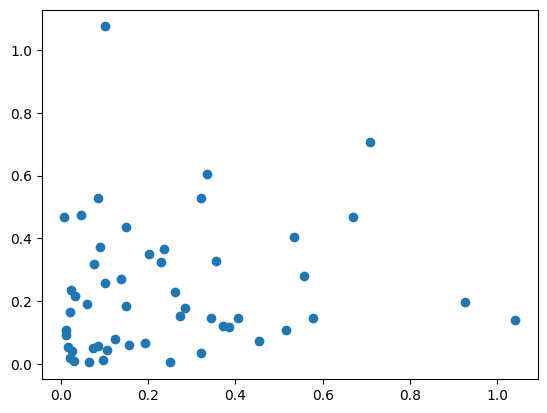

In [1221]:
alpha = 0.95 #@param {type:"number"}
def collect_prediction(X_train,y_train,X_test,y_test,estimator,alpha,model_name):
  estimator.fit(X_train,y_train)
  y_pred = estimator.predict(X_test)
  print( "{model_name} alpha = {alpha:.2f},score = {score:.1f}".format(model_name=model_name, alpha=alpha , score= XGBQuantile.quantile_score(y_test, y_pred, alpha)) )

  return y_pred

regressor = XGBQuantile(colsample_bytree = 0.7,  subsample=0.8, learning_rate = 0.05,
                max_depth = 7, reg_alpha = 1.5, n_estimators = 500,quant_alpha=1.-alpha)     
regressor.fit(xtrainscaled,ytrain)
y_pred_l = regressor.predict(xtestscaled)
#y_lower = collect_prediction(xtrainscaled,ytrain,xtestscaled,ytest,estimator=regressor,alpha=1.-alpha,model_name="Quantile XGB")
regressor = XGBQuantile(quant_alpha=1.-alpha,colsample_bytree = 0.7,  subsample=0.8, learning_rate = 0.05,
                max_depth = 7, reg_alpha = 1.5, n_estimators = 500)     
regressor.fit(xtrainscaled,ytrain)
y_pred_u = regressor.predict(xtestscaled)
#y_upper = collect_prediction(xtrainscaled,ytrain,xtestscaled,ytest,estimator=regressor,alpha=alpha,model_name="Quantile XGB")

regressor = XGBQuantile(n_estimators=1000,max_depth = 15, quant_alpha=0.5,reg_alpha =2.0,gamma = 0.2,reg_lambda =1.0)     
regressor.fit(xtrainscaled,ytrain)



y_true = np.concatenate(([], ytest))
y_pred = np.concatenate(([], ypredtest))
y_pred_low = np.concatenate(([], y_pred_l))
y_pred_upp = np.concatenate(([], y_pred_u))

error = np.abs(ypredtest - ytest)

spred = np.abs(y_pred_l - y_pred_u)

plt.scatter( spred,error)


In [1084]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create Random Forest regressor
rf_model = RandomForestRegressor()

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [5, 10, 20, 25],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=10)
rf_grid_search.fit(xtrainscaled, ytrain)

# Print the best parameters and corresponding score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Score for Random Forest:", -rf_grid_search.best_score_)


Best Parameters for Random Forest: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score for Random Forest: 0.13990901949224277


0.6635483371949931 0.11059995291345646 0.2561893589157239
0.37829769965834836 0.07139187549377943 0.21539071484764308


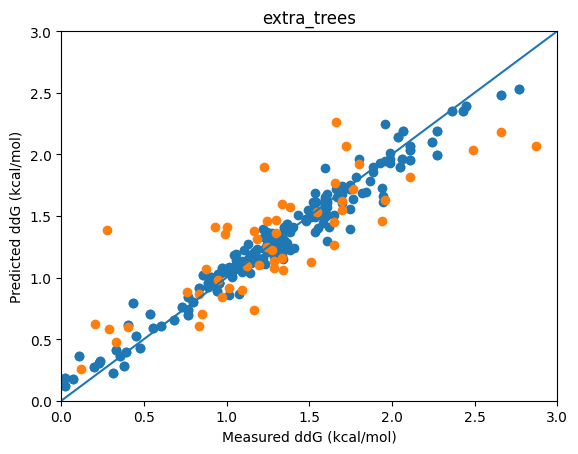

In [23]:
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially
from sklearn.feature_selection import RFECV

#Weighted Best Hyperparameters: {'rfe__n_features_to_select': 30, 'xgb__alpha': 1.6004253340568906, 
# 'xgb__colsample_bytree': 0.6362343432698547, 'xgb__gamma': 0.2181305532875271, 'xgb__learning_rate': 0.2770344813645423, '
# xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 959, 'xgb__subsample': 0.8385011861569944}
weights[ytrain < 1] = 2
weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.63,  subsample=0.83,  learning_rate = 0.05,
                max_depth = 10, alpha =1.6 ,n_estimators = 500,min_child_weight= 1)
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
#rfe = RFECV(estimator=xg_reg, min_features_to_select=20, cv=10)
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.63,  subsample=0.83,  learning_rate = 0.05,
                max_depth = 10, alpha =1.6, n_estimators = 959,min_child_weight= 1)
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)


plt.scatter(y_train_weighted, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

weights = np.ones_like(ytest)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytest < 0.75] = 0
weights[ytest > 2.25] = 0
# Replicate instances based on their weights
ytest_mid = np.repeat(ytest, weights.astype(int))
ypredtest_mid = np.repeat(ypredtest, weights.astype(int))

print(r2_score(ytest_mid ,ypredtest_mid)
,mean_squared_error(ytest_mid, ypredtest_mid)
,mean_absolute_error(ytest_mid, ypredtest_mid))

0.6955790161255357 0.1000706794006749 0.2515647309286063
0.38221929419883727 0.07094154743641529 0.22151132259205


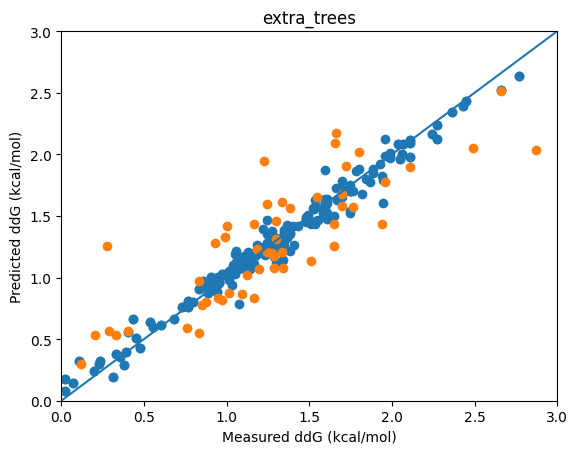

In [42]:
"""Best Hyperparameters: {'rfe__n_features_to_select': 25, 'xgb__alpha': 1.5920762305933587, 
'xgb__colsample_bytree': 0.921365693344509, 'xgb__learning_rate': 0.1173289988355119, 'xgb__max_depth': 10, 
'xgb__min_child_weight': 2, 'xgb__n_estimators': 309, 'xgb__subsample': 0.8083254328574456, 'xgb__xgb__max_bin': 200, 
'xgb__xgb__max_leaves': 30}

Best Hyperparameters: {'rfe__n_features_to_select': 25, 'xgb__alpha': 1.1019707178946314, 
'xgb__colsample_bytree': 0.30552611716401995, 'xgb__learning_rate': 0.15011064066453686, 'xgb__max_bin': 200, 
'xgb__max_depth': 11, 'xgb__max_leaves': 30, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 420, 
'xgb__subsample': 0.8017839472716133}

objective ='reg:squarederror', colsample_bytree = 0.3,  subsample=0.83,  learning_rate = 0.15,
                max_depth = 11, alpha =1.1 ,n_estimators = 420,min_child_weight= 2,max_bin= 200,max_leaves= 30


Best Hyperparameters: {'rfe__n_features_to_select': 25, 'xgb__alpha': 0.5172751293232674, 
'xgb__colsample_bytree': 0.7358067860872892, 'xgb__learning_rate': 0.31470286220847504, 'xgb__max_bin': 300,
 'xgb__max_depth': 12, 'xgb__max_leaves': 30, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 607, 
 'xgb__subsample': 0.9240648009517585}

objective ='reg:squarederror', colsample_bytree = 0.74,  subsample=0.83,  learning_rate = 0.31,
                max_depth = 12, alpha =0.52 ,n_estimators = 607,min_child_weight= 2,max_bin= 300,max_leaves= 30
"""
weights = np.ones_like(ytrain)  
from sklearn.feature_selection import RFECV


weights[ytrain < 1] = 2
weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.74,  subsample=0.82,  learning_rate = 0.11,
                max_depth = 12, alpha =1.12 ,n_estimators = 307,min_child_weight= 2,max_bin= 300,max_leaves= 30)
rfe = RFE(estimator=xg_reg, n_features_to_select=25)  # Set the desired number of features
#rfe = RFECV(estimator=xg_reg, min_features_to_select=20, cv=10)
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.74,  subsample=0.82,  learning_rate = 0.11,
                max_depth = 12, alpha =1.12 ,n_estimators = 307,min_child_weight= 2,max_bin= 300,max_leaves= 30)
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)


plt.scatter(y_train_weighted, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

weights = np.ones_like(ytest)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytest < 0.75] = 0
weights[ytest > 2.25] = 0
# Replicate instances based on their weights
ytest_mid = np.repeat(ytest, weights.astype(int))
ypredtest_mid = np.repeat(ypredtest, weights.astype(int))

print(r2_score(ytest_mid ,ypredtest_mid)
,mean_squared_error(ytest_mid, ypredtest_mid)
,mean_absolute_error(ytest_mid, ypredtest_mid))

0.7057956737489162 0.09671221226557963 0.2297476335570828
0.5619759390058692 0.05029957136814147 0.17787895725864777


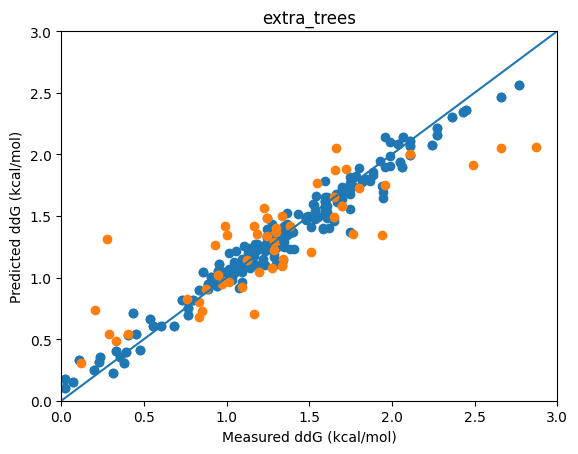

In [41]:
from sklearn.feature_selection import SequentialFeatureSelector

weights = np.ones_like(ytrain)  
from sklearn.feature_selection import RFECV


weights[ytrain < 1] = 2
weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.82,  subsample=0.83,  learning_rate = 0.11,
                max_depth = 10, alpha =1.6 ,n_estimators = 309,min_child_weight= 2,max_bin= 200,max_leaves= 30)
rfe = SequentialFeatureSelector(estimator=xg_reg, n_features_to_select=25)  # Set the desired number of features
#rfe = RFECV(estimator=xg_reg, min_features_to_select=20, cv=10)
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.82,  subsample=0.83,  learning_rate = 0.11,
                max_depth = 10, alpha =1.6, n_estimators = 600,min_child_weight= 2,max_bin= 200,max_leaves= 30)
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)


plt.scatter(y_train_weighted, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

weights = np.ones_like(ytest)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytest < 0.75] = 0
weights[ytest > 2.25] = 0
# Replicate instances based on their weights
ytest_mid = np.repeat(ytest, weights.astype(int))
ypredtest_mid = np.repeat(ypredtest, weights.astype(int))

print(r2_score(ytest_mid ,ypredtest_mid)
,mean_squared_error(ytest_mid, ypredtest_mid)
,mean_absolute_error(ytest_mid, ypredtest_mid))